This is the collection of codes that explore the food atlas datasets and CDC datasets

The codes are written to explore the datasets and test the following hypothesis:

i.	Is there a pattern of how the food environment, physical activity and diabetes and obesity prevalence differ by states or counties?

ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

iii. Does either food environment or physical activity or both of them correlate with high diabetes and obesity prevalence? Does such correlation differ by different areas of US or by other demographic composition, e.g. age? 

iv. Do change in physical activity or food environment correlate with change in prevalence of diabetes and obesity? How is the correlation for the overall population? Or in different states or areas of US?

v. Are there counties with both high level of physical activity and rich food choice but high prevalence of diabetes or obesity? Similarly, are there counties with low level of physical activity and poor food choice but relatively low prevalence of diabetes and obestiy (clustering analysis?) If there are, whether additional data can explain the unusual observation? 

x. Are there counties with small change in level of physical activity and food choice but great change in prevalence of diabetes or obesity? Or vice versa? If there are, whether additional data can explain the unusual observation? 

This document is broken into five sections: 

I. Importing packages and Defining functions for analysis
II. Testing hypothesis i & ii
III. Testing hypothesis iii-vi
IV. Testing hypothesis vii
V. Testing hypothesis ix and x


Section I. Importing packages, Defining functions for analysis and import datasets

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [61]:
##define functions

#Define function Boxplot_by_state() to draw boxplot by a groups: State, Areas with differnet composition of age group, socioeconomics, or their combinations

##### df: dataframe to read in, col:the col category by which the data is grouped, vert: direction of boxplot, 0 for horizontal and 1 for vertical
def Boxplot_by_state(df, col, by, vert):
    by_values=list(set(df[by]))
    by_values.sort()
    plt.figure(figsize=(18, 16))   
    boxes=list()
    for v in by_values:
        df_one_type=df[df[by]==v]
        boxes.append(list(df_one_type[col]))
        
    plt.boxplot(boxes,vert=vert)
    plt.yticks(range(1,len(by_values)+1), by_values)
    

#create a subset of dataframe by category
def Df_subset(df, category,var_info_dict):
    vars_to_drop=[]
    for c in df_food.columns:
        if c not in ['State','County']:
            if var_info_dict[c][1] !=category:
                vars_to_drop.append(c)

    df_sub=df.drop(vars_to_drop, axis=1)
    return df_sub

#a function that transform 
def Df_subgroups(df, cutoffs,col):
    df_list=list()
    for i in range(1,len(cutoffs)):
        df_list.append(df[(df[col]<cutoffs[i])&(df[col]>=cutoffs[i-1])])
    return df_list     

def Boxplot_by_state_multivariate(df, col, by, vert):
    by_values=list(set(df[by]))
    by_values.sort()
    plt.figure(figsize=(18, 16))   
    boxes=list()
    for v in by_values:
        df_one_type=df[df[by]==v]
        boxes.append(list(df_one_type[col]))
        
    plt.boxplot(boxes,vert=vert)
    plt.yticks(range(1,len(by_values)+1), by_values)

Read food atlas dataset and CDC datasets and merge these two datasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Combined_data.csv'

df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

II. Testing hypothesis:
    i.	Is there a pattern of how the food choice, physical activity and diabetes and obesity prevalence differ by states or counties?

    ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 1001 to 56045
Data columns (total 33 columns):
State                               3143 non-null object
County                              3143 non-null object
Low_Access_Overall                  3102 non-null float64
Low_Access_low_income               3123 non-null float64
Low_Access_Child                    3124 non-null float64
Low_Access_Seniors                  3124 non-null float64
Grocery                             3143 non-null float64
Supercenter                         3143 non-null float64
Convenience                         3143 non-null float64
Specialized                         3143 non-null float64
SNAP_store                          3141 non-null float64
WIC_store                           3143 non-null float64
Fast_food                           3143 non-null float64
Full_service                        3143 non-null float64
Assistance                          3143 non-null float64
Low_insecurity       

The result indicates that except 'State' and 'County' columns, other columns are numeric values. In addition, most columns have complete data (3143 rows), while several have non complete data: column 'Low_Access_Overall' has 3102 valid rows, column 'Low_Access_low_income' has 3123 valid rows, and column 'Poverty_rate' has 3139 valid rows.

However, it looks like that the several columns can be combined as new variables to better describe the conditions of the counties. For example, a county may have many fast food restaurants and full service restaurants. Therefore, the percentage of fast food (or full service) restaurants can better justify people's food choice. This also applies to areas with few choices overall: areas with few fast food restaurants and even fewer full service ones may likely pick fast food over full service. This reasoning also applies to different types of stores. Therefore, new columns are created as follow: 

In [9]:
#add more columns as combination of other columns
df['Adult']=100-df['>=65']-df['<18']
df['percentage_fast_food']=df['Fast_food']/(df['Fast_food']+df['Full_service'])
df['grocery_super']=df['Grocery']+df['Supercenter']
df['percentage_grocery_super']=(df['Grocery']+df['Supercenter'])/(df['Grocery']+df['Supercenter']+df['Convenience']+df['Specialized'])
df['assist_store']=df['SNAP_store']+df['WIC_store']  

In [11]:
#check the updated dataframe
df.shape

(3143, 38)

In [17]:
df.columns

Index(['State', 'County', 'Low_Access_Overall', 'Low_Access_low_income',
       'Low_Access_Child', 'Low_Access_Seniors', 'Grocery', 'Supercenter',
       'Convenience', 'Specialized', 'SNAP_store', 'WIC_store', 'Fast_food',
       'Full_service', 'Assistance', 'Low_insecurity', 'Very_low_insecurity',
       'Farm', 'Adult_db', 'Adult_ob', 'Recreation_facility', 'White', 'Black',
       'Hispanic', 'Asian', 'American Indian or Alaska Native',
       'Hawaiian or Pacific Islander', '>=65', '<18', 'Poverty_rate',
       '2013_db', '2013_ob', '2013_phy', 'Adult', 'percentage_fast_food',
       'grocery_super', 'percentage_grocery_super', 'assist_store'],
      dtype='object')

In [ ]:
#construct variable dicitonary for graph titles

var_information={'State':, 'County'}

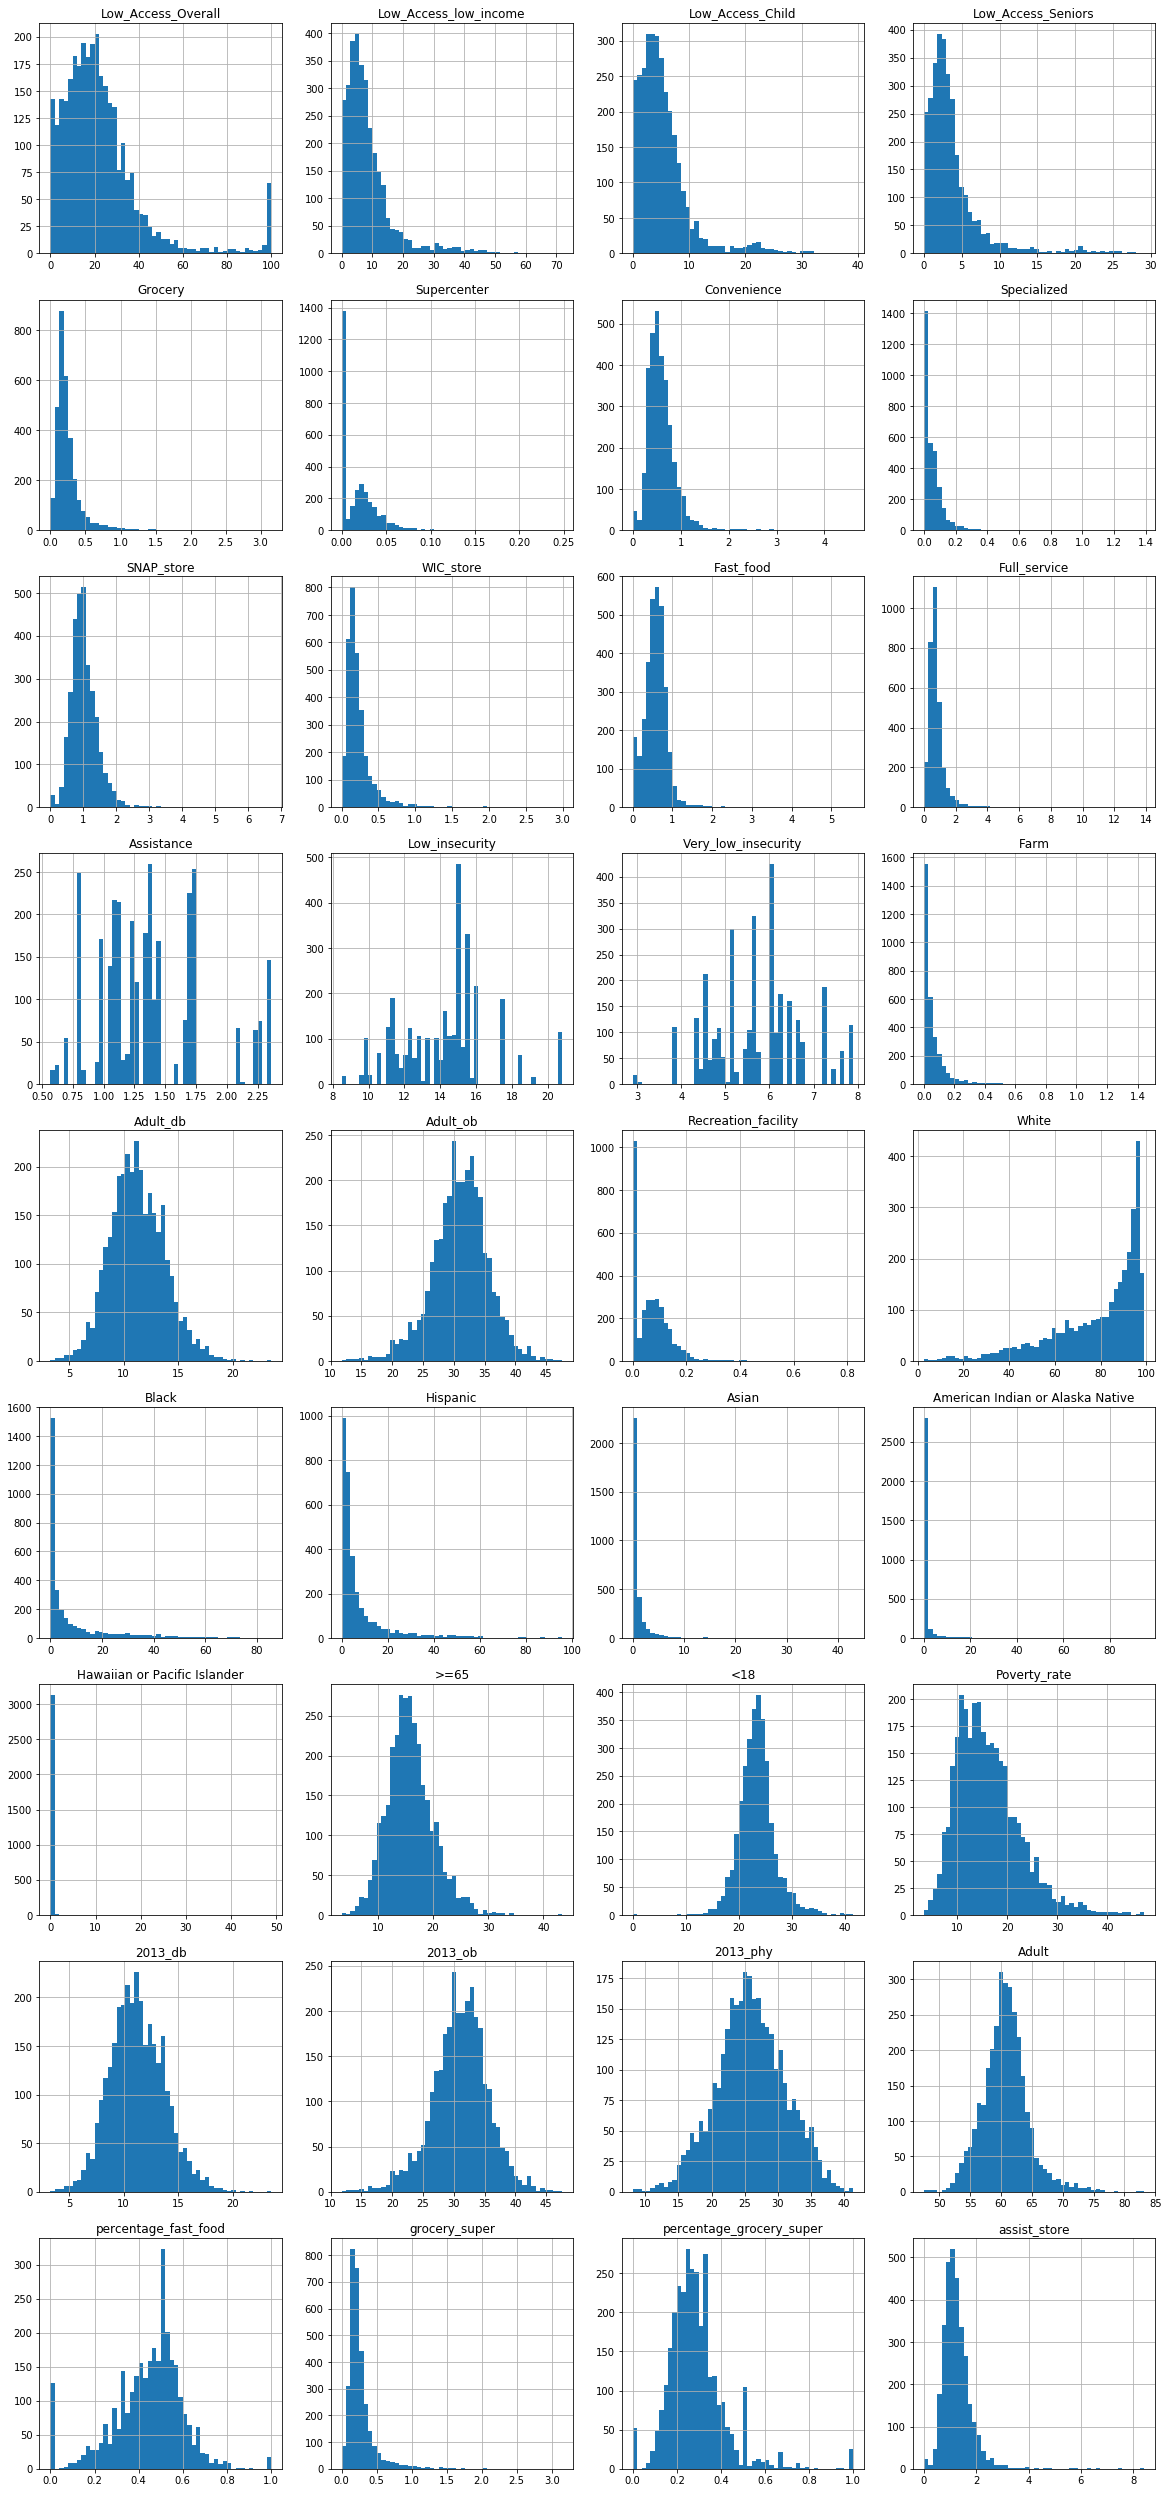

In [88]:
#there are in total 38 columns, and 36 excluding the 'State' and 'County' columns, describe the dataset
plt.figure(figsize=(20, 45)) 
n=1
for c in df.columns:
    if is_numeric_dtype(df[c]):
        plt.subplot(9,4,n)
        plt.title(c)
        df[c].hist(bins=50)
        plt.legend()
        n+=1
plt.show()

In [ ]:
df['db_level']=pd.qcut(df['2013_db'],5,labels=["very low", "low", "median","high","very high"])
df['ob_level']=pd.qcut(df['2013_ob'],5,labels=["very low", "low", "median","high","very high"])

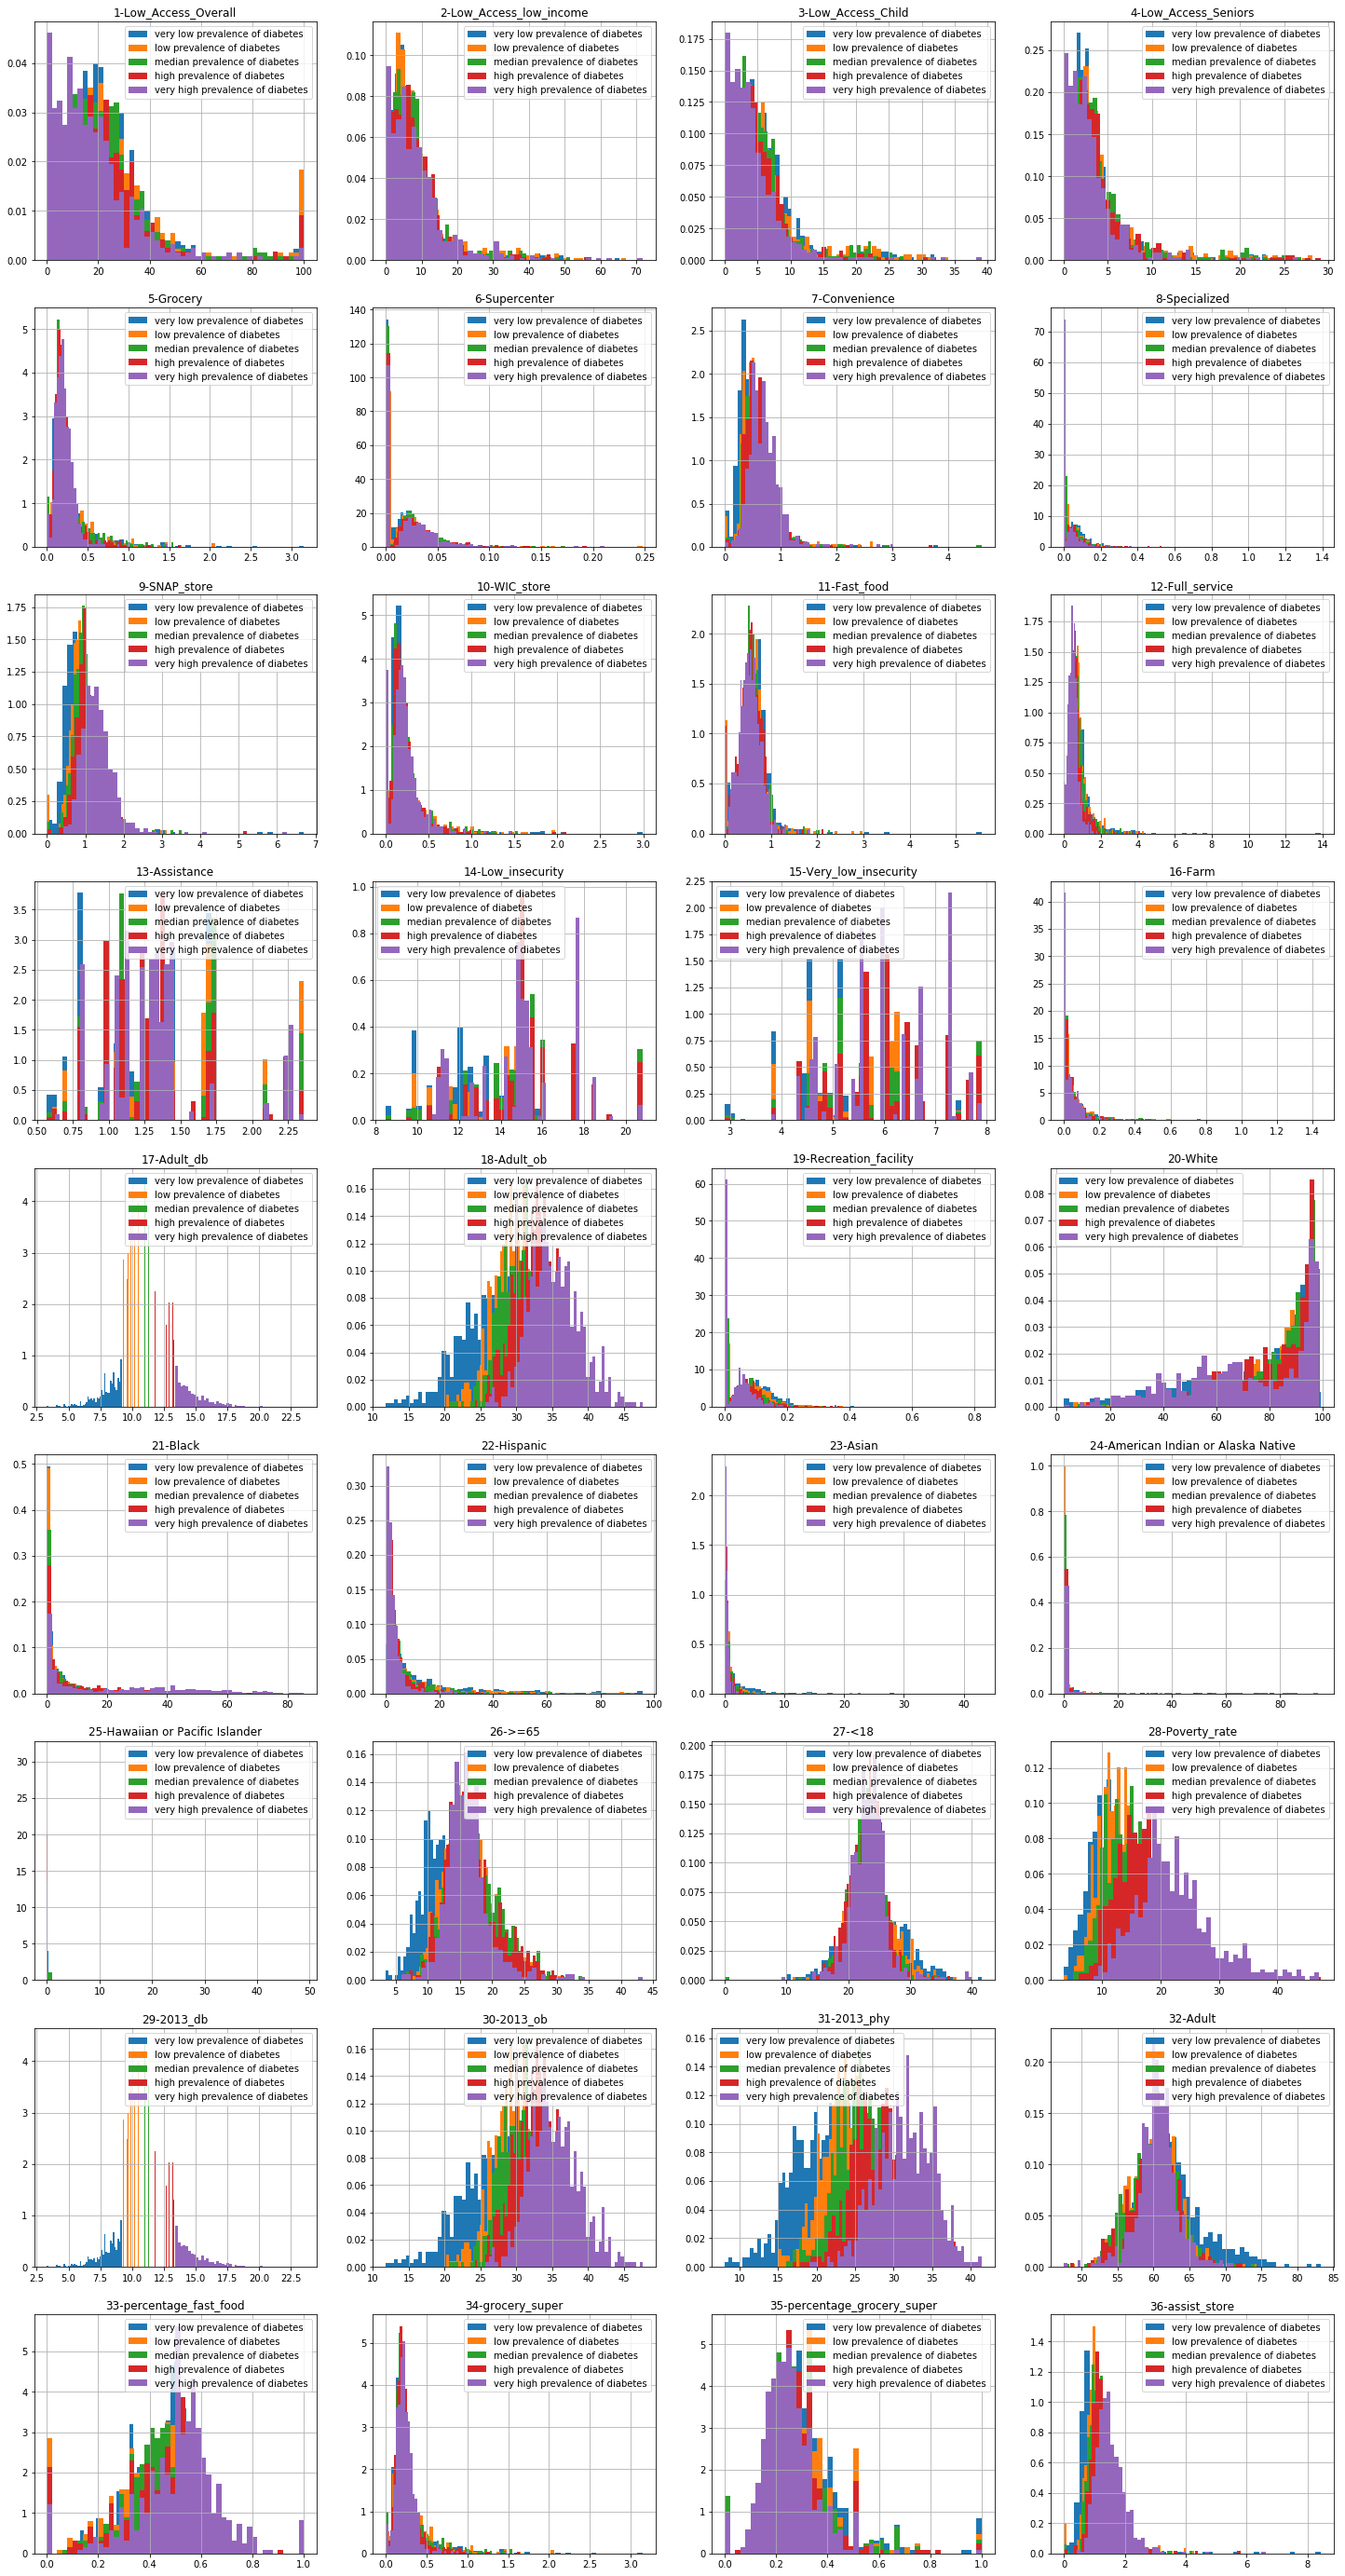

In [95]:
#there are in total 38 columns, and 36 excluding the 'State' and 'County' columns, describe the dataset
plt.figure(figsize=(25, 50)) 
n=1
for c in df.columns:
    if is_numeric_dtype(df[c]):
        plt.subplot(9,4,n)
        plt.title(str(n)+'-'+c)
        for level in ["very low", "low", "median","high","very high"]:
            df[df['db_level']==level][c].hist(bins=50, label='{} prevalence of diabetes'.format(level),normed=1)
        plt.legend()
        n+=1
plt.show()

The histograms of variable seperated by levels of diabetes prevalence show a clearer pattern that whether counties with different levels of diabetes prevalence differ in each of the variables. 

The colors of histogram are blue, orange, green, red and purple for low to high levels of diabetes prevalence. 

If histograms shift towards right as level of diabetes prevalence increases (purple histograms on right side of blue histograms), then it indicates that the variable tends to be higher in areas with high prevalence of diabetes, and vice versa. 

As shown in above figure, as levels of diabetes prevalence increases (color from blue to purple), variables whose distribution shift towards right are convenience store (panel 7), store that accept SNAP food assistance (panel 9), poverty rate (panel 28), prevalence of obesity (panel 30), prevalence of physical inactivity (panel 31), percentage of fast food restaurants (panel 33) and number of stores are food assistance authorized (panel 36). This suggest that these variables tend to be higher among areas with higher diabetes prevalence. 

As levels of diabetes prevalence increases (color from blue to purple), variables whose distribution shift towards left are number of specialized stores (panel 8), number of full service restaurants (panel 12), number of recreation facility (panel 19), percentage of hispanic population (panel 22), percentage of asian (panel 23) and percentage of grocery store or super centers among all kinds of stores (panel 35). This suggest that these variables tend to be lower among areas with higher diabetes prevalence. 

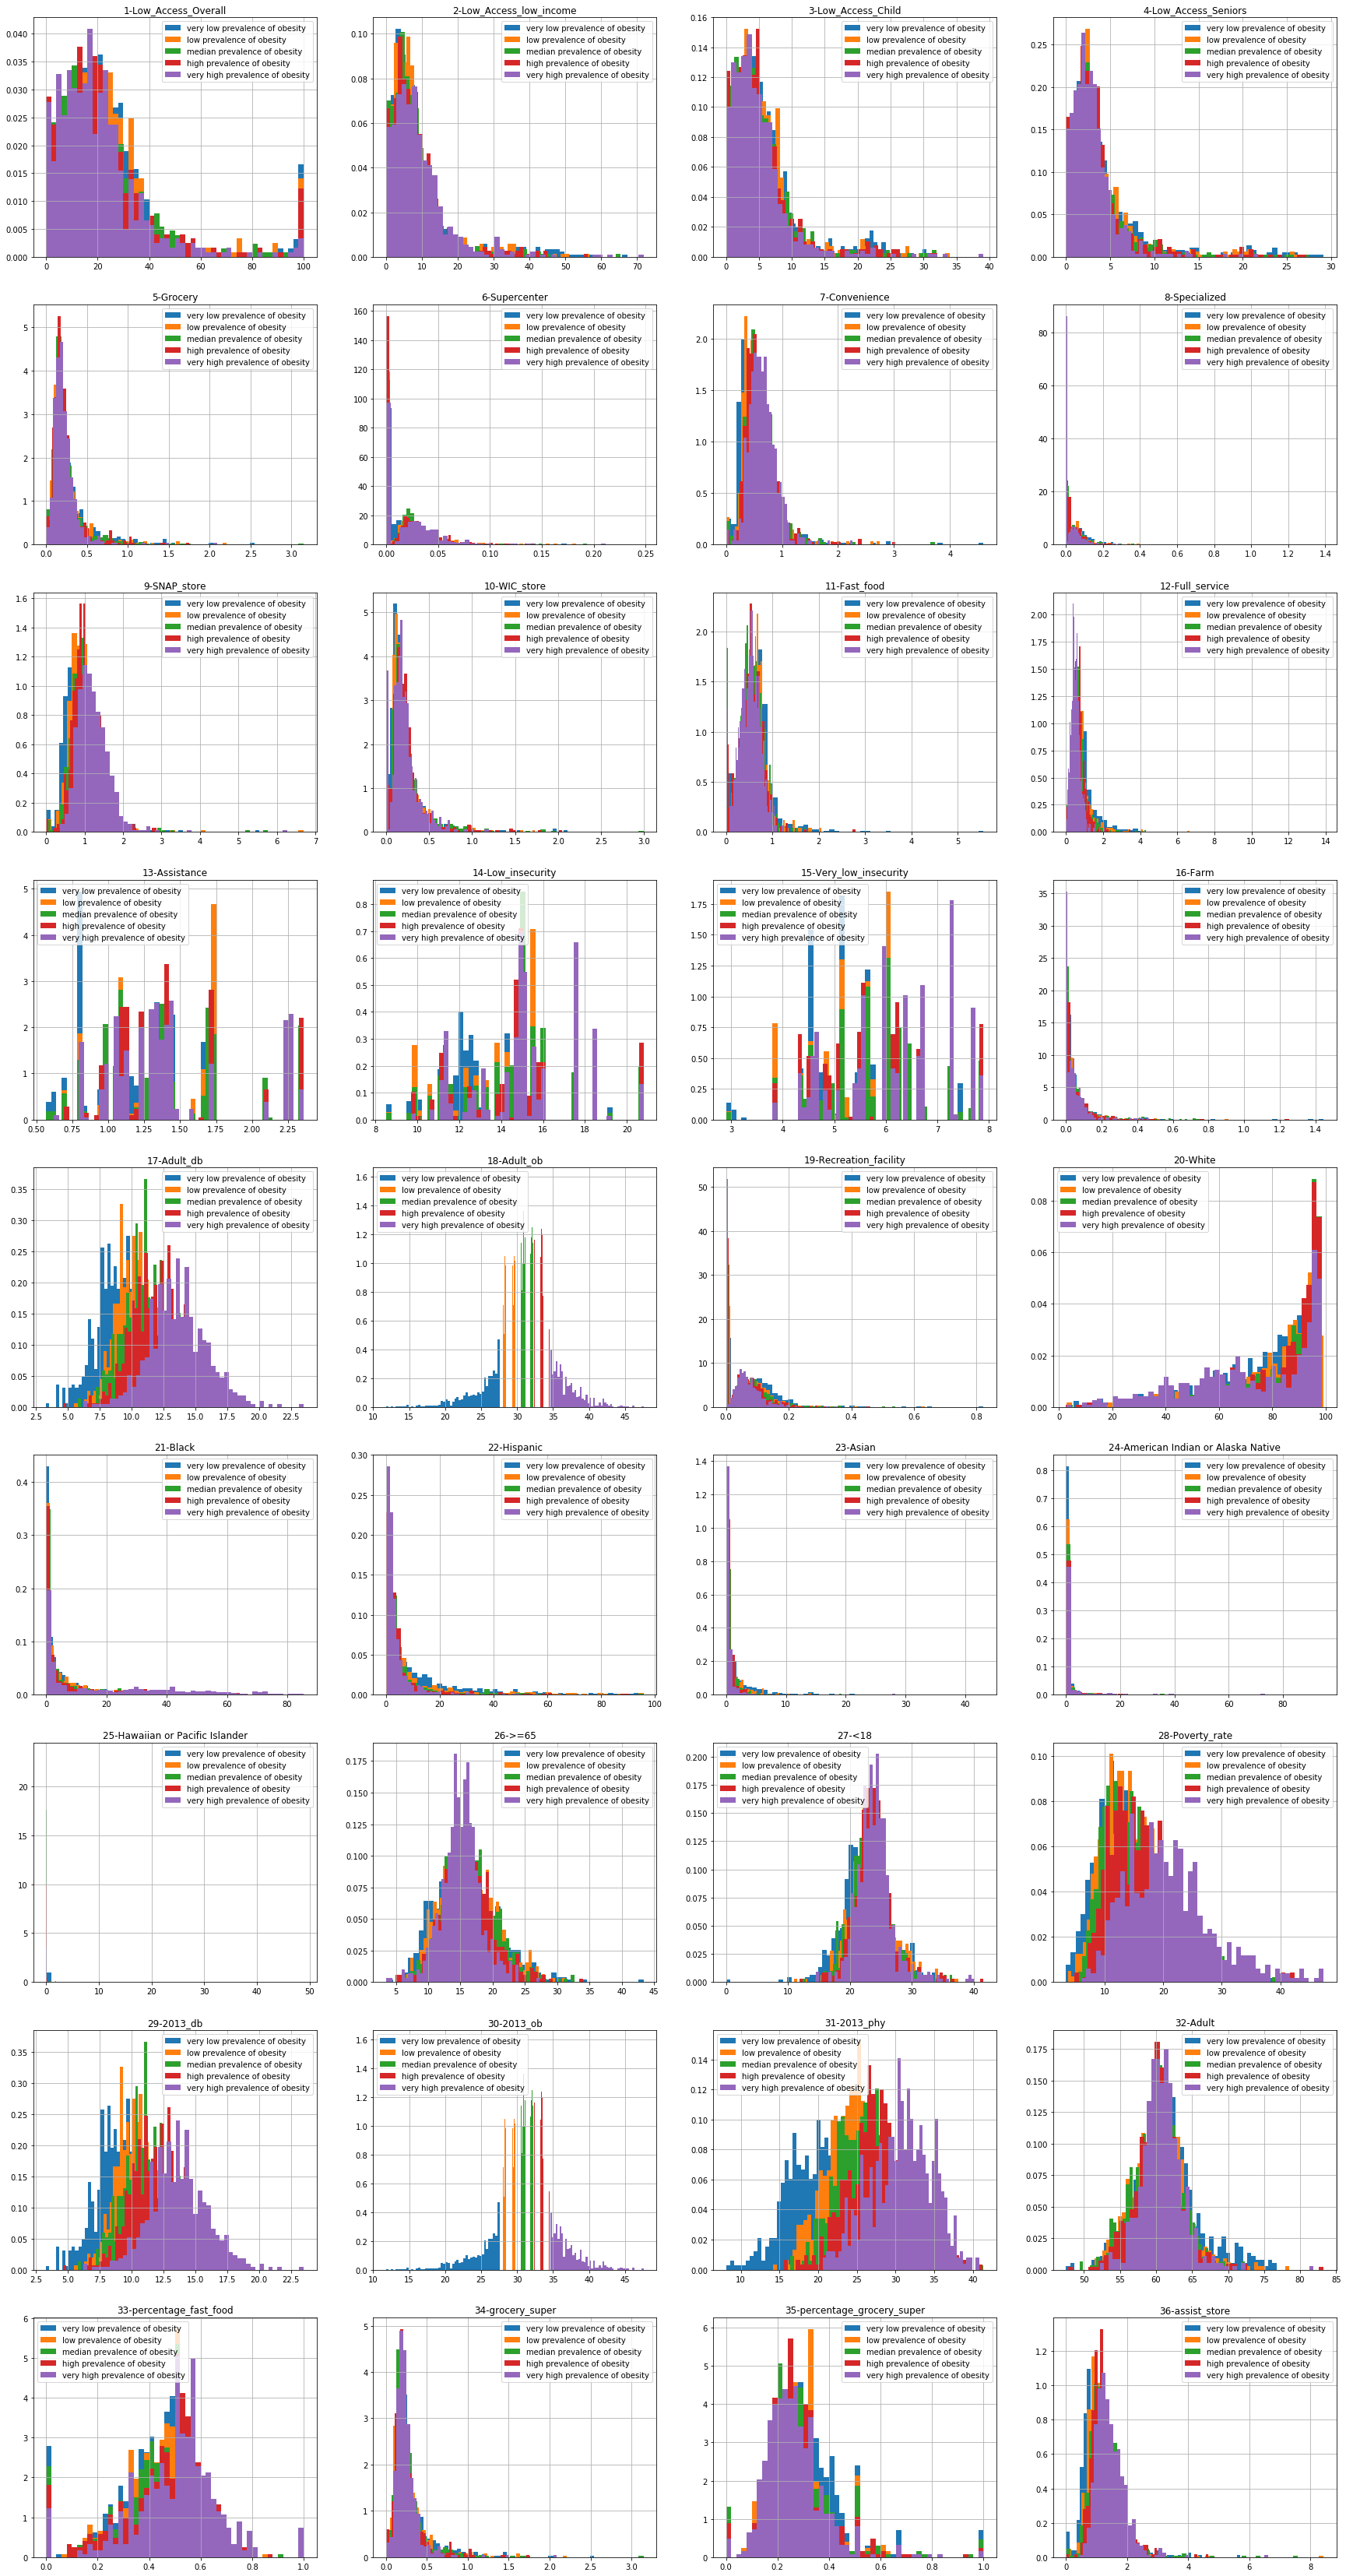

In [120]:
plt.figure(figsize=(30, 60)) 
n=1
for c in df.columns:
    if is_numeric_dtype(df[c]):
        plt.subplot(9,4,n)
        plt.title(str(n)+'-'+c)
        for level in ["very low", "low", "median","high","very high"]:
            df[df['ob_level']==level][c].hist(bins=50, label='{} prevalence of obesity'.format(level),normed=1)
        plt.legend()
        n+=1
plt.show()

The distribution of variables at different levels of obesity prevalence are similar as those observed at different levels of 
diabetes prevalence

Exploring the pattern of distribution of each variable within each state

In [18]:
#read state_region csv file
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/state_region.csv'
state_region=pd.read_csv(url,index_col='State Code',encoding="ISO-8859-1")

In [22]:
#adding two columns for states information: 
''' Division, which include nine types:
           'East North Central',  'East South Central',  'Middle Atlantic',  'Mountain',  
           'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central'
    and full state names
           '''
 
df['Division']=df['State'].apply(lambda x: state_region.loc[x, 'Division'])
df['State_name']=df['State'].apply(lambda x: state_region.loc[x, 'State'])

In [49]:
df_by_states=df.groupby('State_name')

In [55]:
df_mean_by_states=df_by_states.mean()
df_range_by_states=df_by_states.quantile(0.75)-df_by_states.quantile(0.25)
df_skew_by_states=df_by_states.skew()

Explore the distribution of food environment variables within states

states with largest average Low_Access_Overall are  ['South Dakota', 'Alaska', 'North Dakota']
states with largest range of Low_Access_Overall are  ['South Dakota', 'Alaska', 'North Dakota']
states with most skewed distribution of Low_Access_Overall are  ['North Carolina', 'California', 'Missouri']


C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


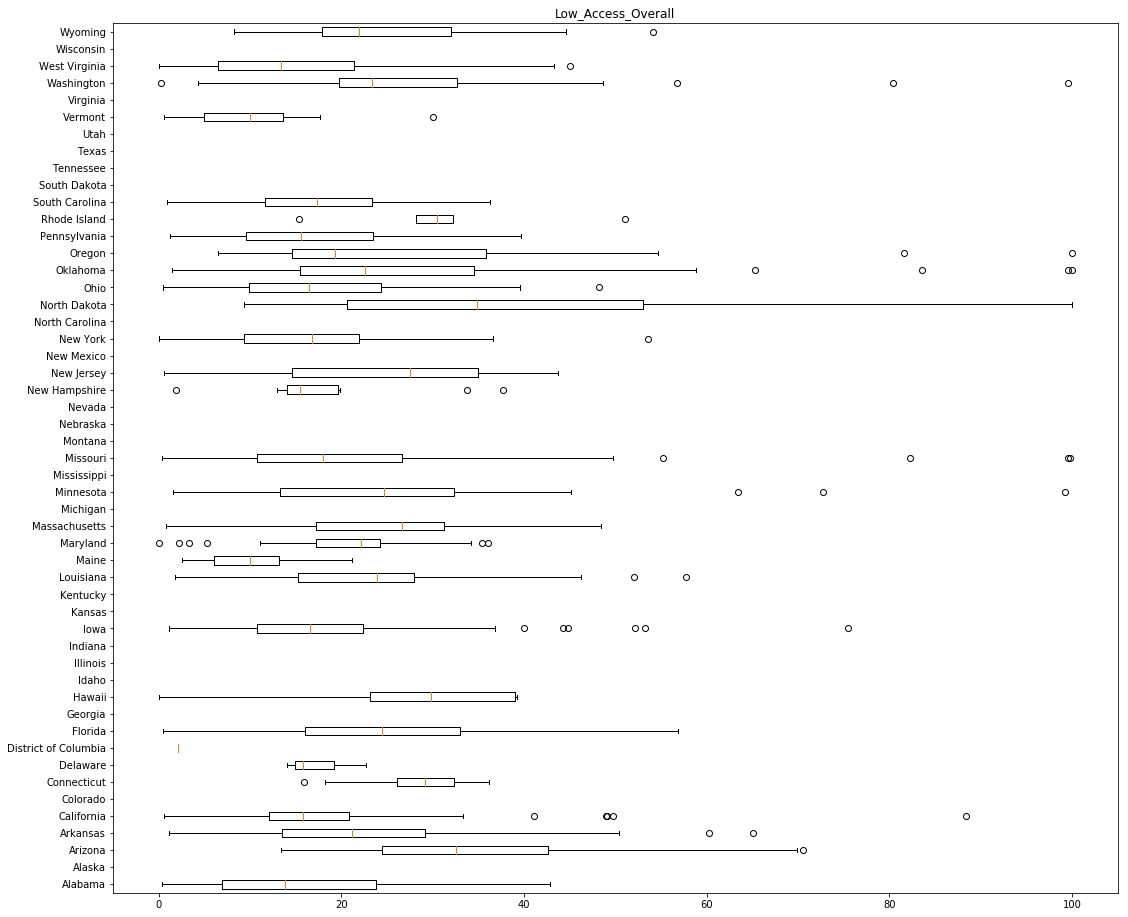

states with largest average percentage_fast_food are  ['Mississippi', 'Louisiana', 'Ohio']
states with largest range of percentage_fast_food are  ['North Dakota', 'Nebraska', 'Montana']
states with most skewed distribution of percentage_fast_food are  ['Wisconsin', 'Montana', 'Rhode Island']


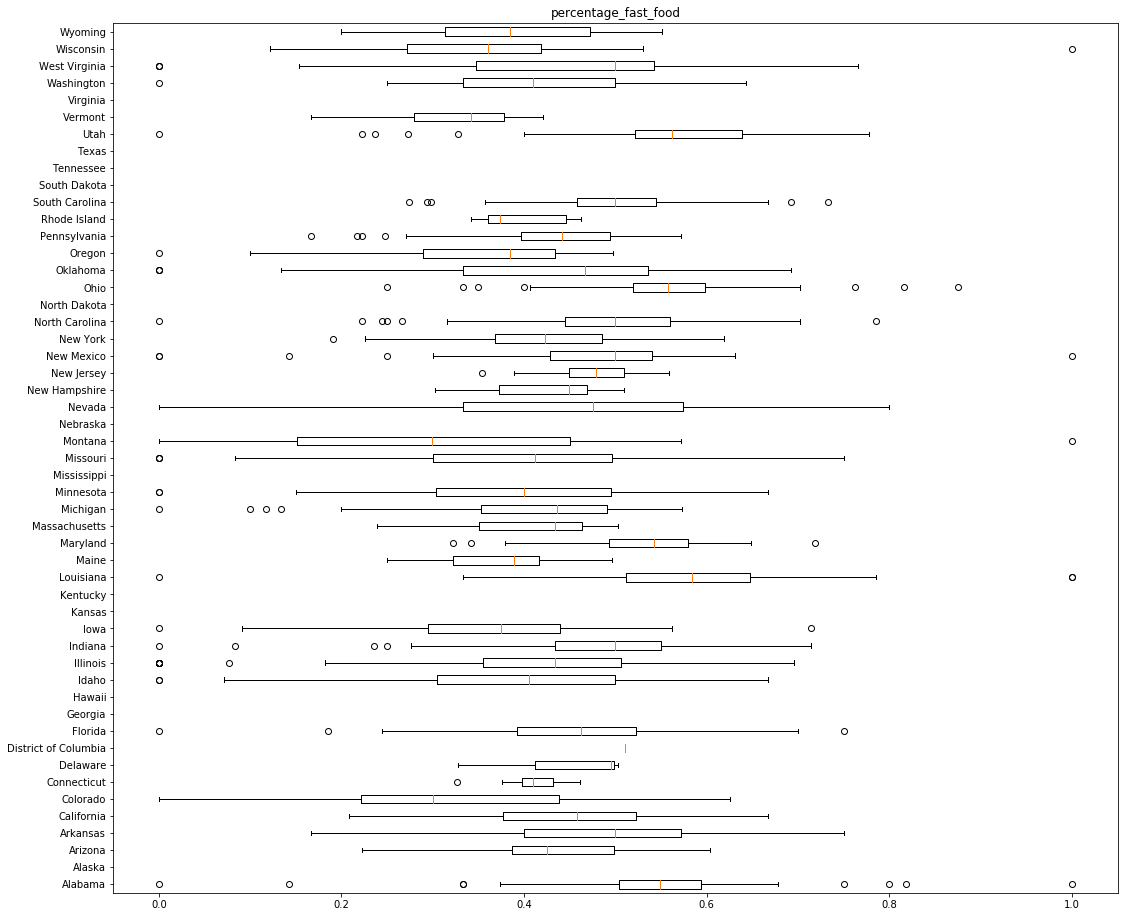

states with largest average grocery_super are  ['Alaska', 'North Dakota', 'Nebraska']
states with largest range of grocery_super are  ['Alaska', 'North Dakota', 'Nebraska']
states with most skewed distribution of grocery_super are  ['New Mexico', 'Oregon', 'Utah']


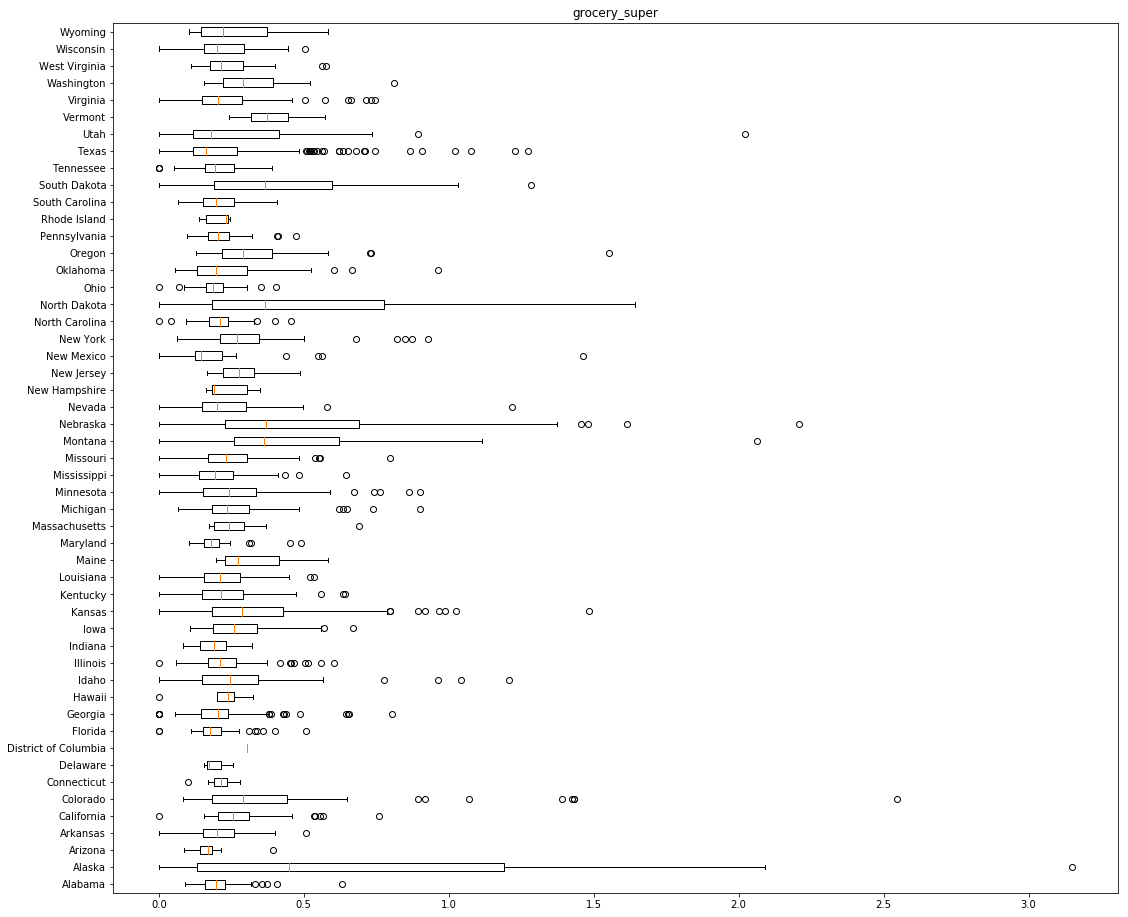

states with largest average assist_store are  ['Alaska', 'South Dakota', 'Kentucky']
states with largest range of assist_store are  ['Alaska', 'South Dakota', 'Nebraska']
states with most skewed distribution of assist_store are  ['Arizona', 'South Dakota', 'Utah']


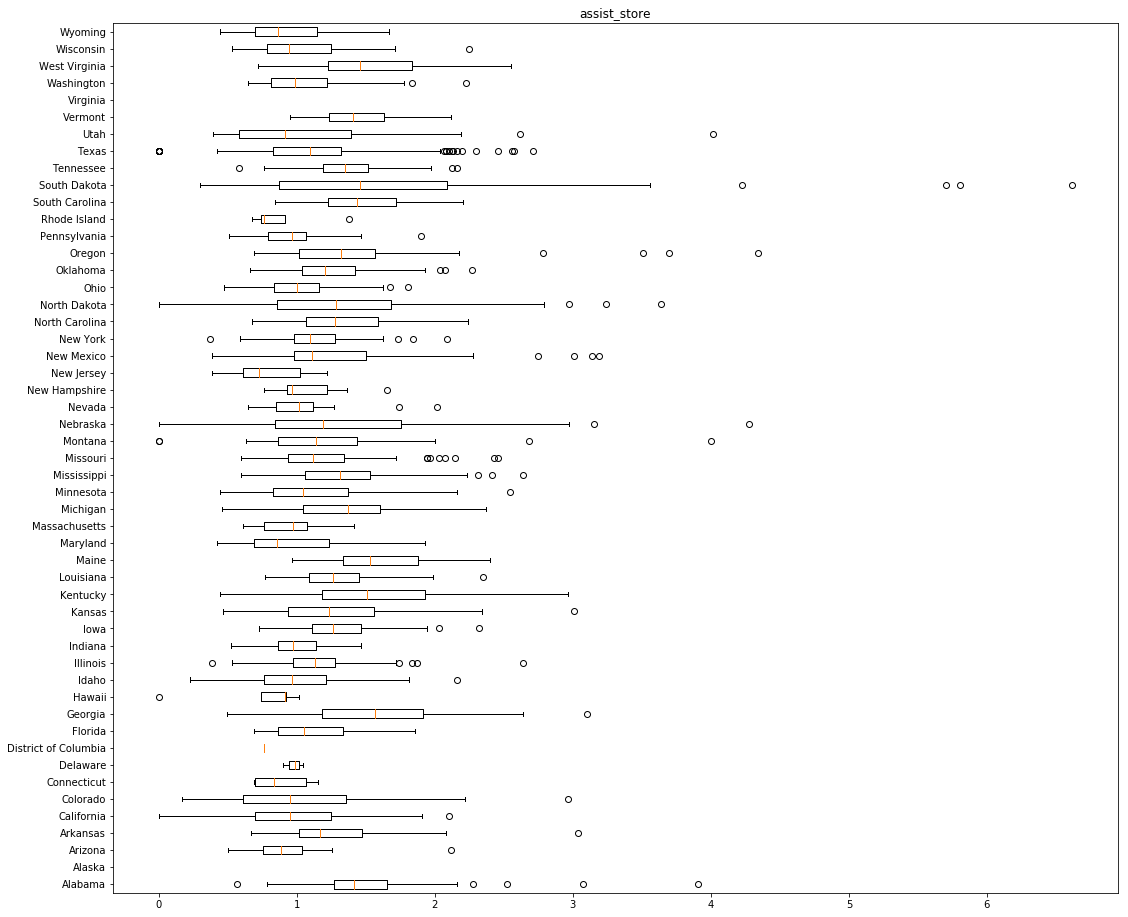

states with largest average Farm are  ['Vermont', 'North Dakota', 'Montana']
states with largest range of Farm are  ['North Dakota', 'Wyoming', 'Nebraska']
states with most skewed distribution of Farm are  ['Texas', 'Colorado', 'Georgia']


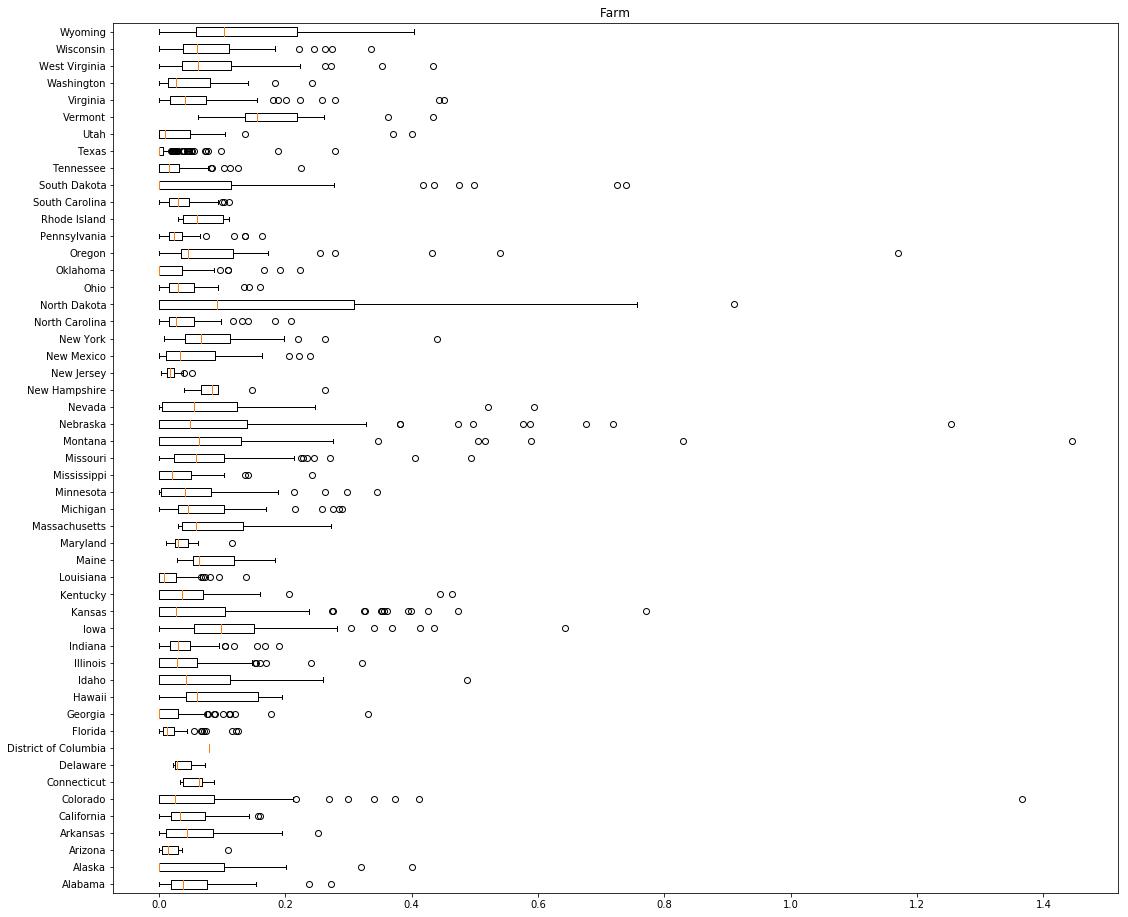

In [69]:
for col in ['Low_Access_Overall', 'percentage_fast_food', 'grocery_super','assist_store','Farm']:
    print ('states with largest average {} are '.format(col), list(df_mean_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with largest range of {} are '.format(col), list(df_range_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with most skewed distribution of {} are '.format(col), list(df_skew_by_states.sort_values(by=col,ascending=False).index[:3]))
    Boxplot_by_state(df, col=col, by='State_name', vert=0)
    plt.title(col)
    plt.legend()
    plt.show()

Explore the socioeconomic and demographic variables within states

states with largest average Poverty_rate are  ['Mississippi', 'Alabama', 'Louisiana']
states with largest range of Poverty_rate are  ['Georgia', 'Virginia', 'Kentucky']
states with most skewed distribution of Poverty_rate are  ['North Dakota', 'Wisconsin', 'South Dakota']


C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


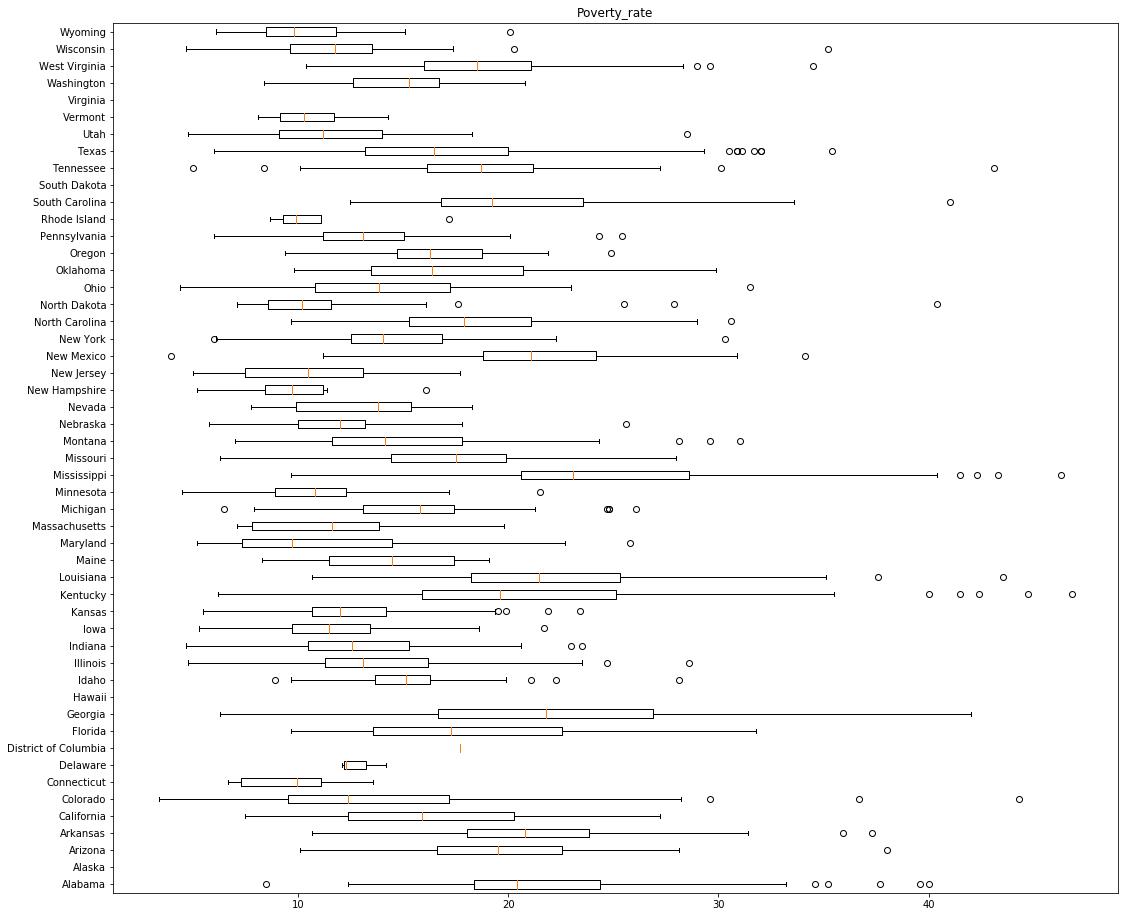

states with largest average >=65 are  ['North Dakota', 'Nebraska', 'Montana']
states with largest range of >=65 are  ['North Dakota', 'Arizona', 'Florida']
states with most skewed distribution of >=65 are  ['Hawaii', 'New Jersey', 'Massachusetts']


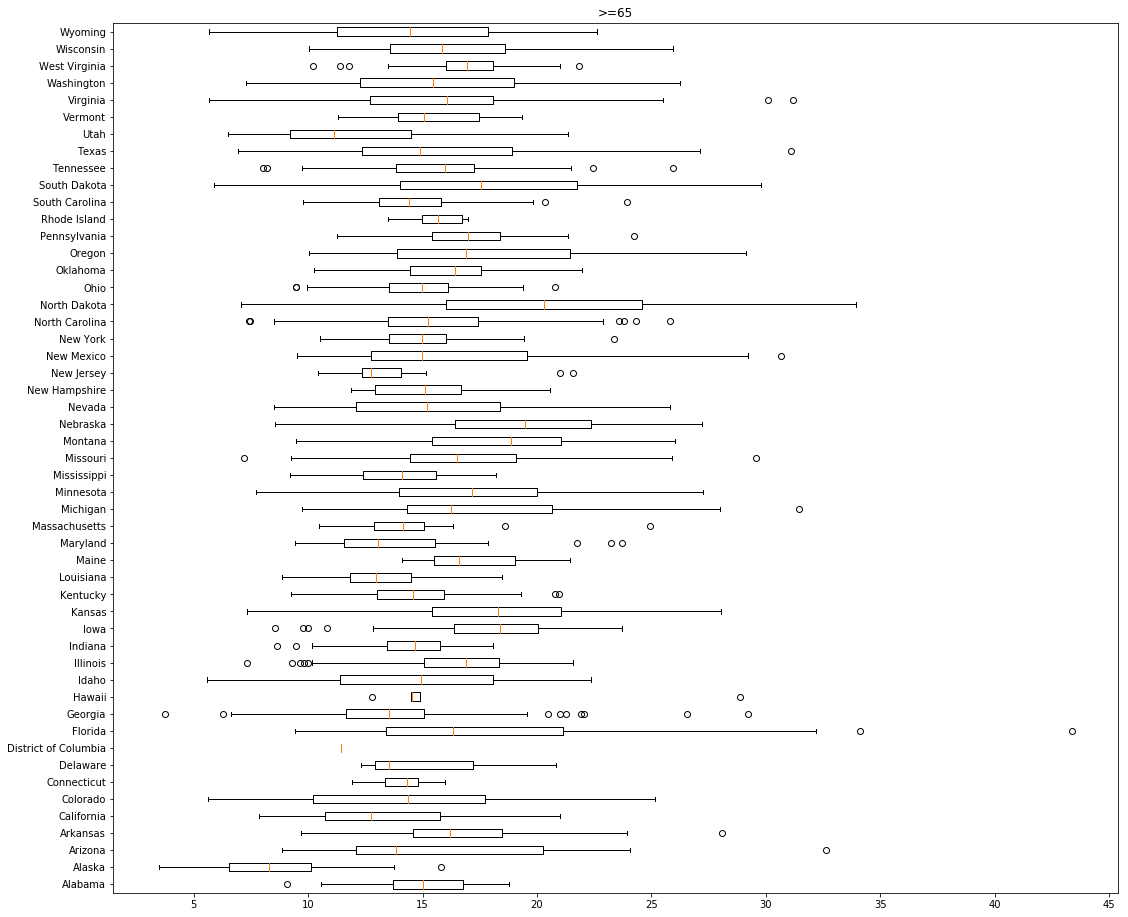

states with largest average <18 are  ['Utah', 'Idaho', 'Alaska']
states with largest range of <18 are  ['Idaho', 'California', 'Arizona']
states with most skewed distribution of <18 are  ['North Dakota', 'Vermont', 'Rhode Island']


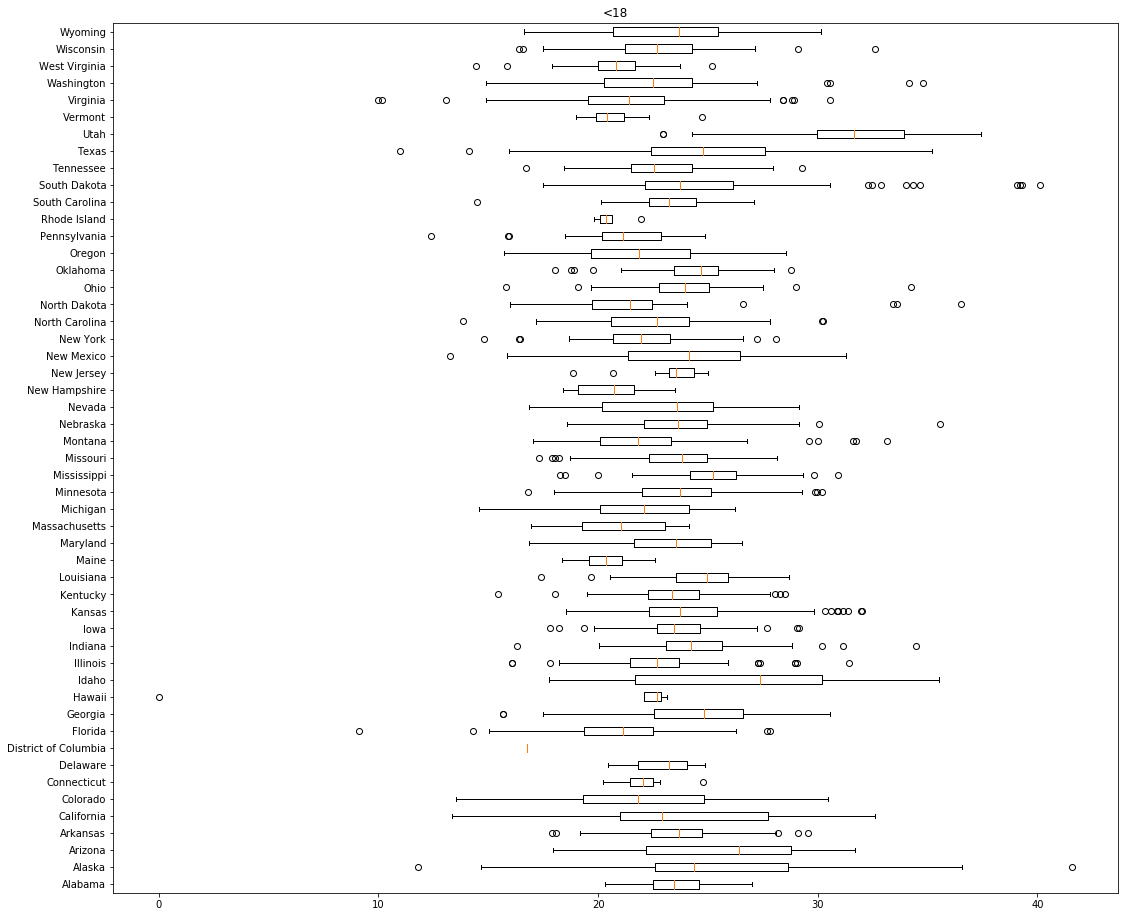

states with largest average White are  ['Maine', 'Vermont', 'West Virginia']
states with largest range of White are  ['Alaska', 'California', 'New Jersey']
states with most skewed distribution of White are  ['Delaware', 'California', 'Georgia']


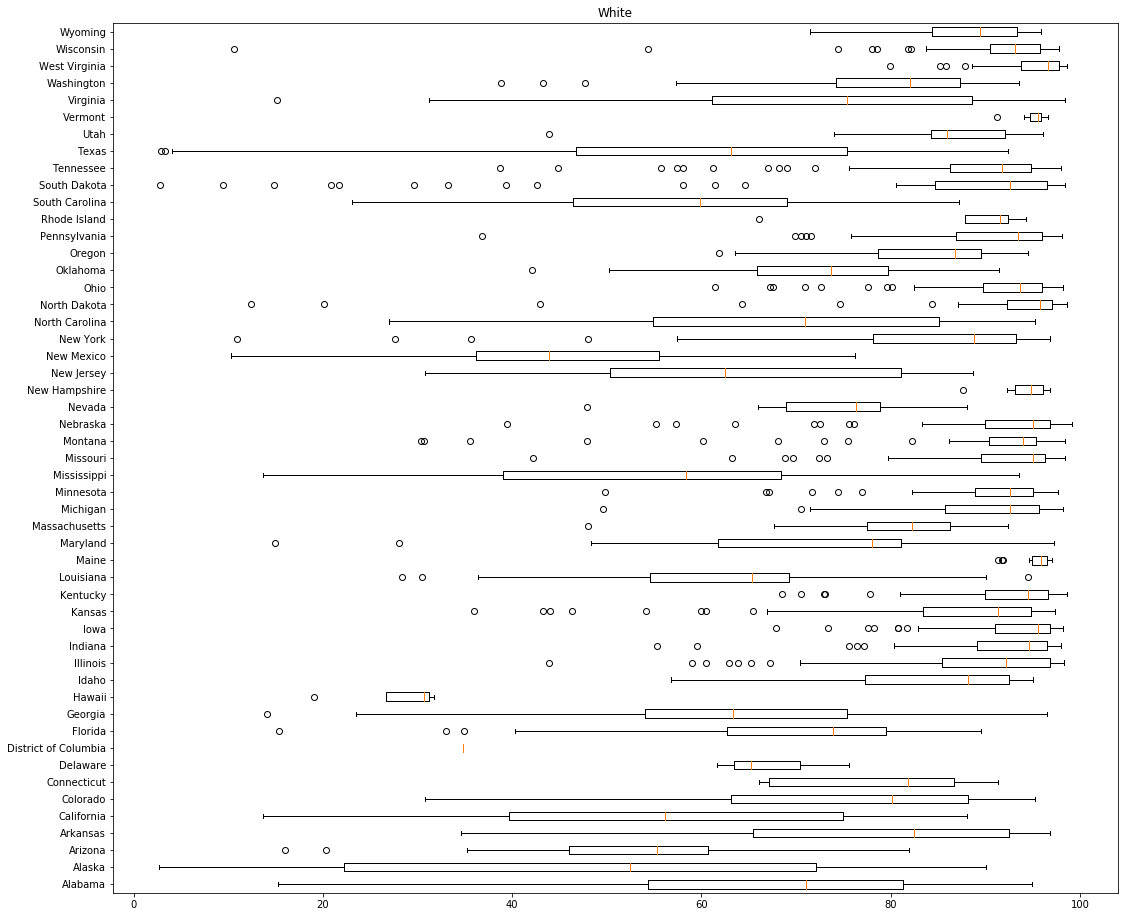

states with largest average Black are  ['District of Columbia', 'Mississippi', 'South Carolina']
states with largest range of Black are  ['Mississippi', 'Alabama', 'North Carolina']
states with most skewed distribution of Black are  ['Wisconsin', 'Nebraska', 'Oregon']


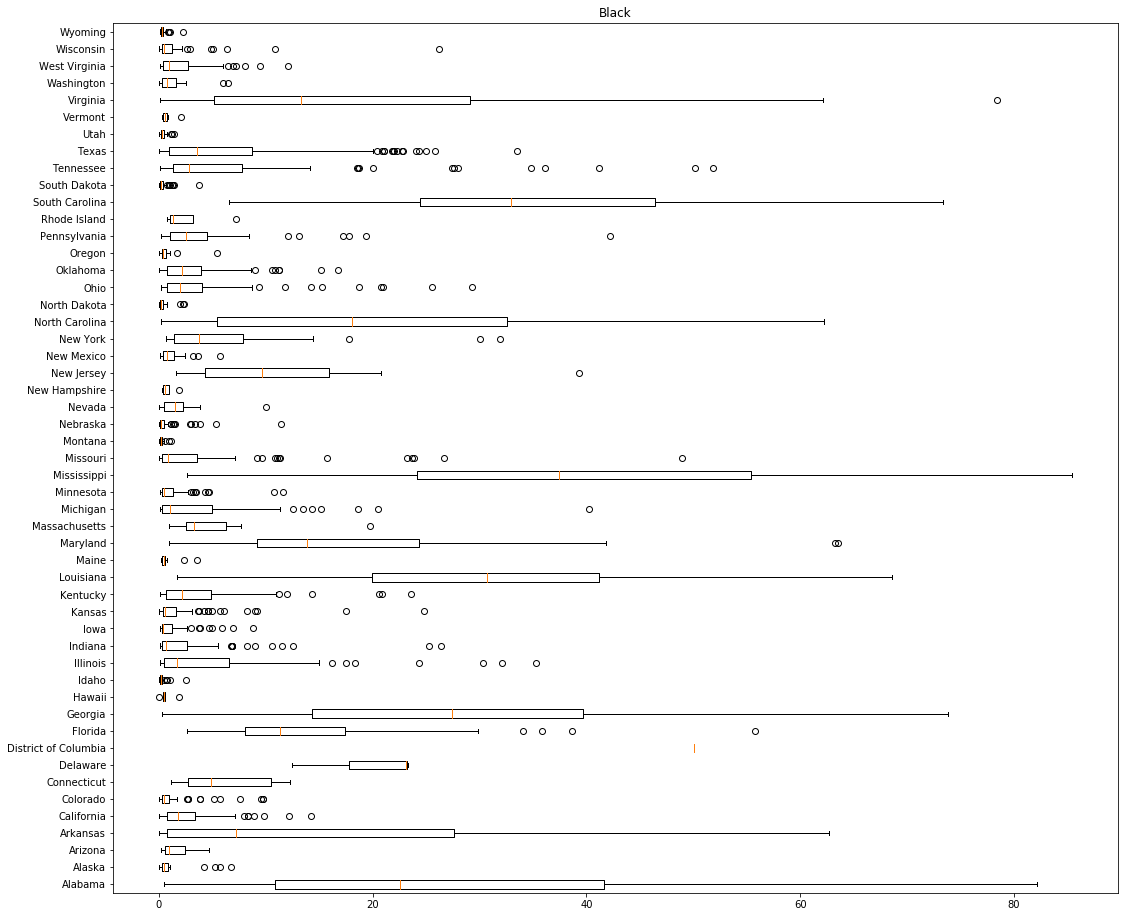

In [70]:
for col in ['Poverty_rate', '>=65', '<18','White','Black']:
    print ('states with largest average {} are '.format(col), list(df_mean_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with largest range of {} are '.format(col), list(df_range_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with most skewed distribution of {} are '.format(col), list(df_skew_by_states.sort_values(by=col,ascending=False).index[:3]))
    Boxplot_by_state(df, col=col, by='State_name', vert=0)
    plt.title(col)
    plt.legend()
    plt.show()


states with largest average 2013_phy are  ['Arkansas', 'Mississippi', 'Tennessee']
states with largest range of 2013_phy are  ['Florida', 'South Carolina', 'Maryland']
states with most skewed distribution of 2013_phy are  ['New Hampshire', 'Connecticut', 'Massachusetts']


C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


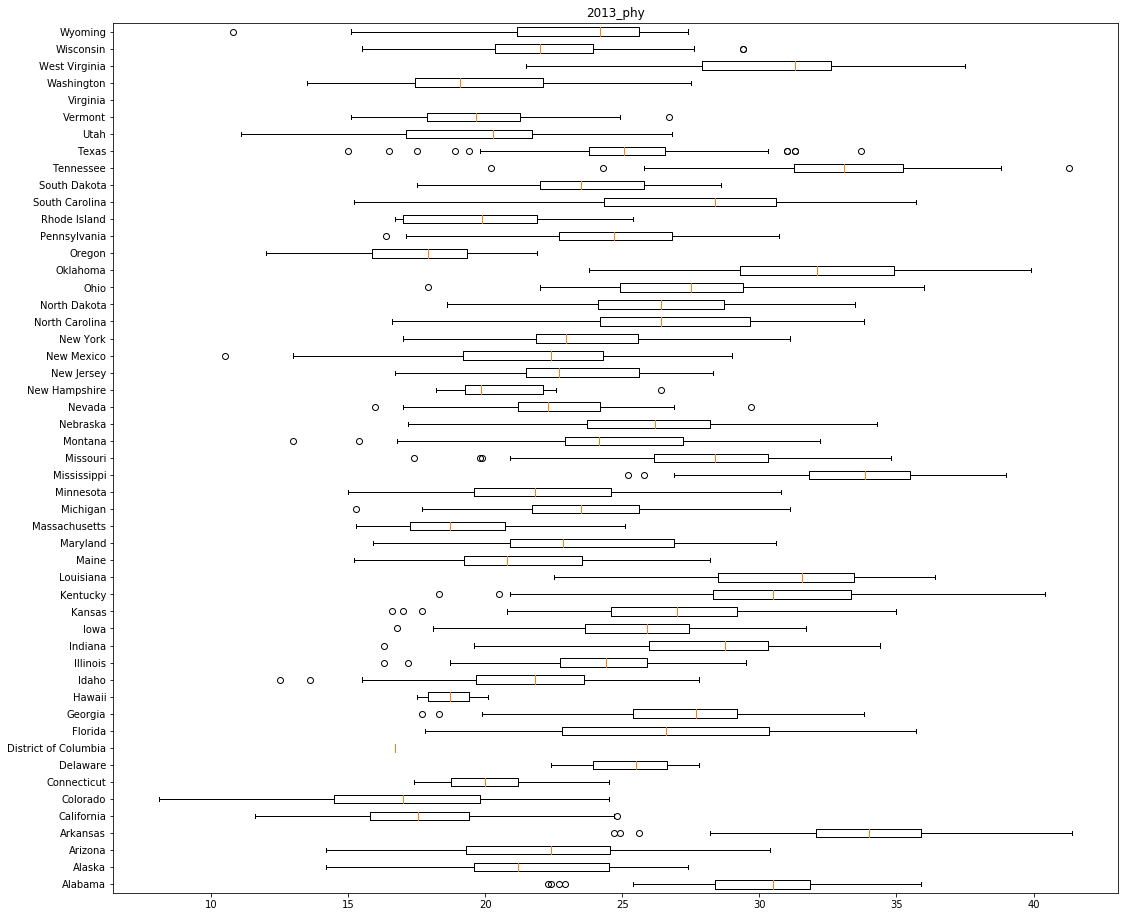

states with largest average Recreation_facility are  ['Massachusetts', 'New Jersey', 'New Hampshire']
states with largest range of Recreation_facility are  ['North Dakota', 'Montana', 'Iowa']
states with most skewed distribution of Recreation_facility are  ['Texas', 'New Mexico', 'North Dakota']


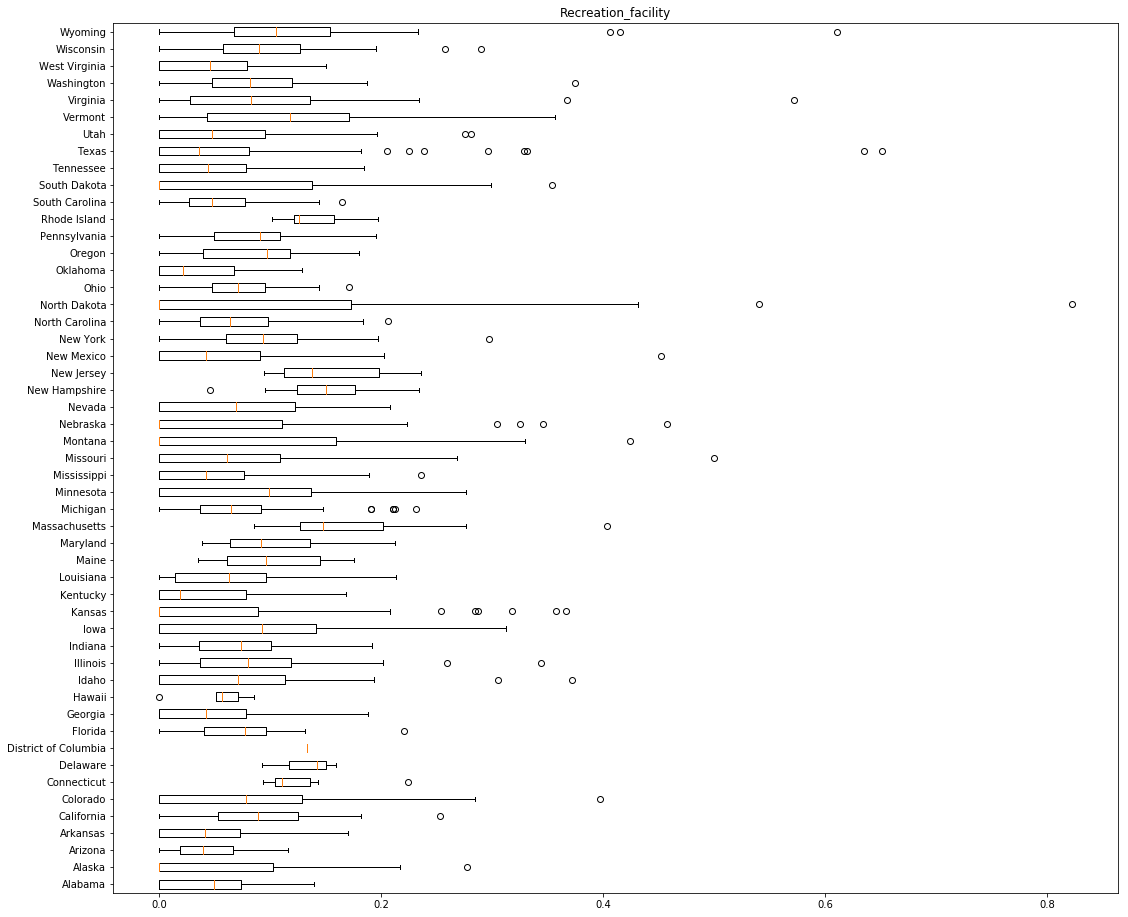

In [71]:
for col in ['2013_phy', 'Recreation_facility']:
    print ('states with largest average {} are '.format(col), list(df_mean_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with largest range of {} are '.format(col), list(df_range_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with most skewed distribution of {} are '.format(col), list(df_skew_by_states.sort_values(by=col,ascending=False).index[:3]))
    Boxplot_by_state(df, col=col, by='State_name', vert=0)
    plt.title(col)
    plt.legend()
    plt.show()


states with largest average 2013_db are  ['Alabama', 'Mississippi', 'South Carolina']
states with largest range of 2013_db are  ['Alabama', 'South Carolina', 'Arizona']
states with most skewed distribution of 2013_db are  ['Hawaii', 'South Dakota', 'Nebraska']


C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


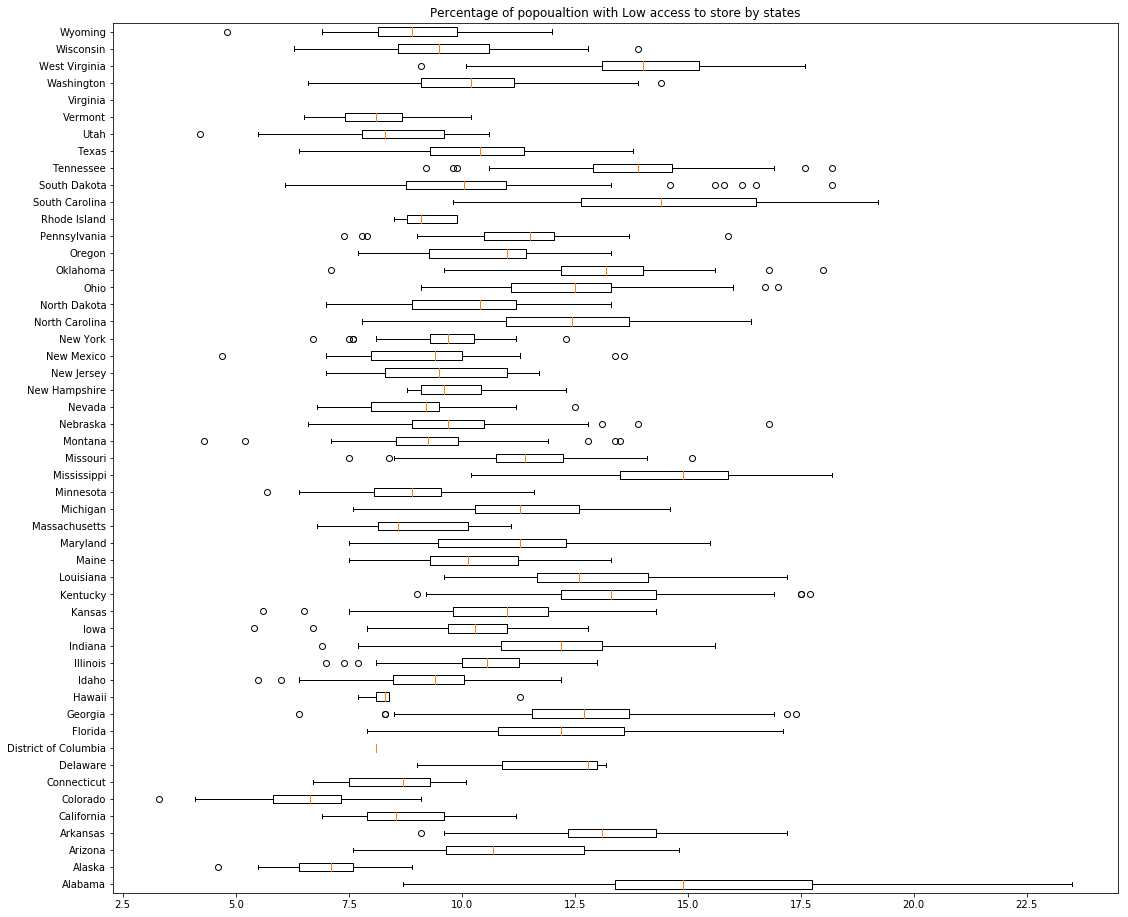

states with largest average 2013_ob are  ['Mississippi', 'Louisiana', 'Alabama']
states with largest range of 2013_ob are  ['Florida', 'Maine', 'South Carolina']
states with most skewed distribution of 2013_ob are  ['South Dakota', 'Alaska', 'North Dakota']


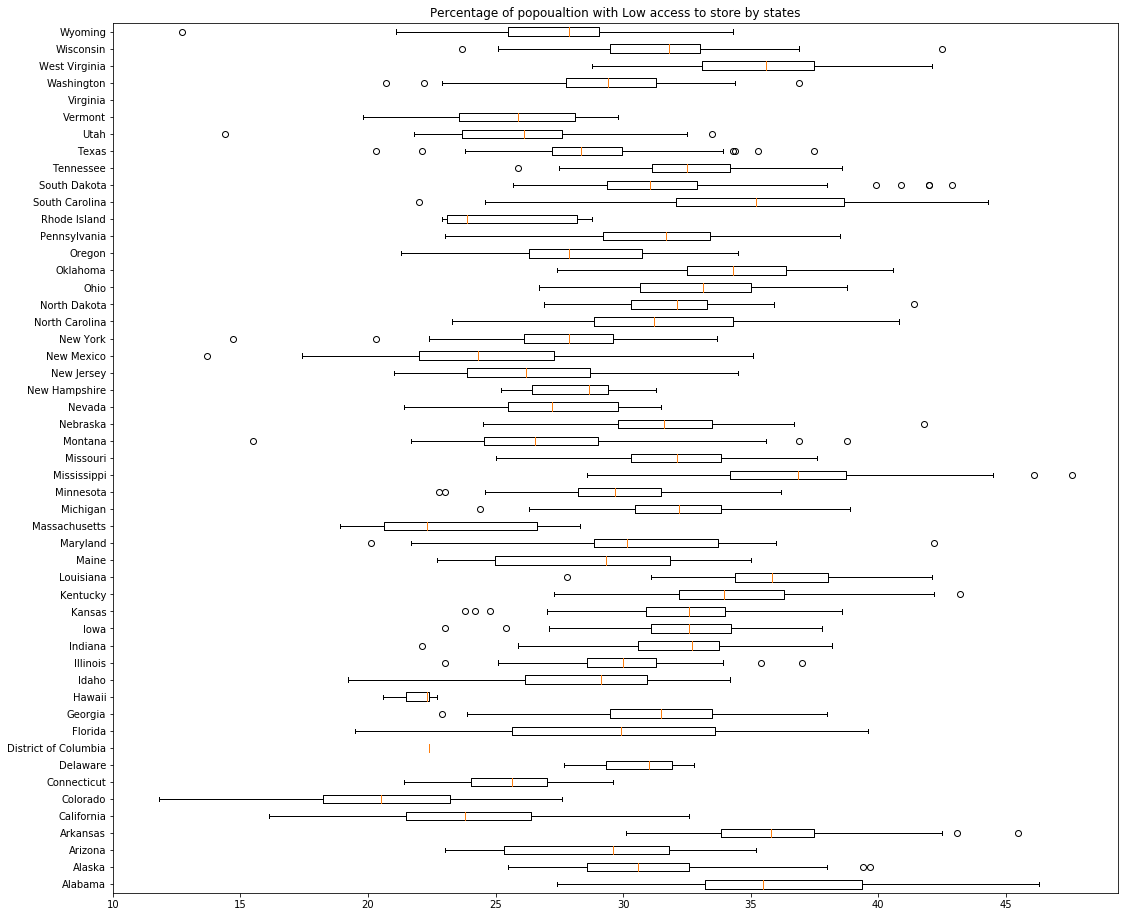

states with largest average Adult_db are  ['Alabama', 'Mississippi', 'South Carolina']
states with largest range of Adult_db are  ['Alabama', 'South Carolina', 'Arizona']
states with most skewed distribution of Adult_db are  ['Hawaii', 'South Dakota', 'Nebraska']


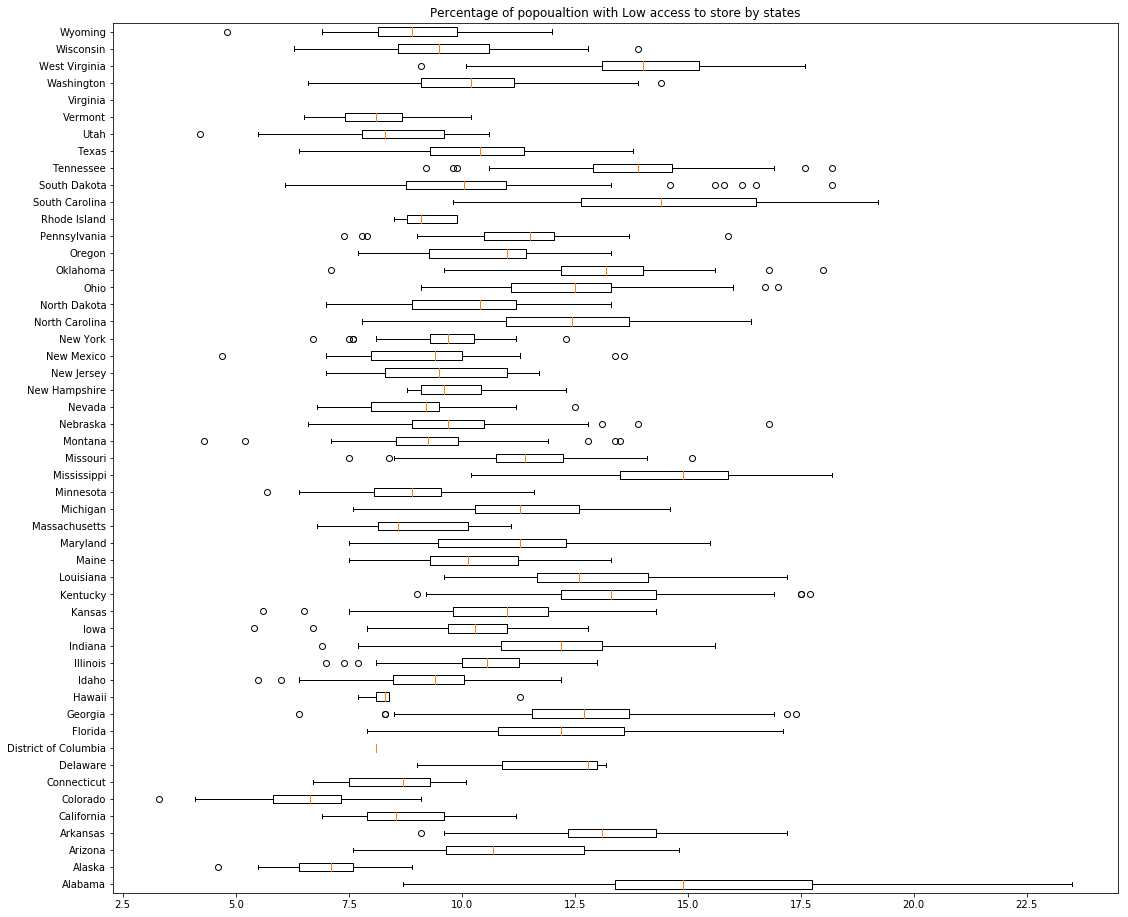

states with largest average Adult_ob are  ['Mississippi', 'Louisiana', 'Alabama']
states with largest range of Adult_ob are  ['Florida', 'Maine', 'South Carolina']
states with most skewed distribution of Adult_ob are  ['South Dakota', 'Alaska', 'North Dakota']


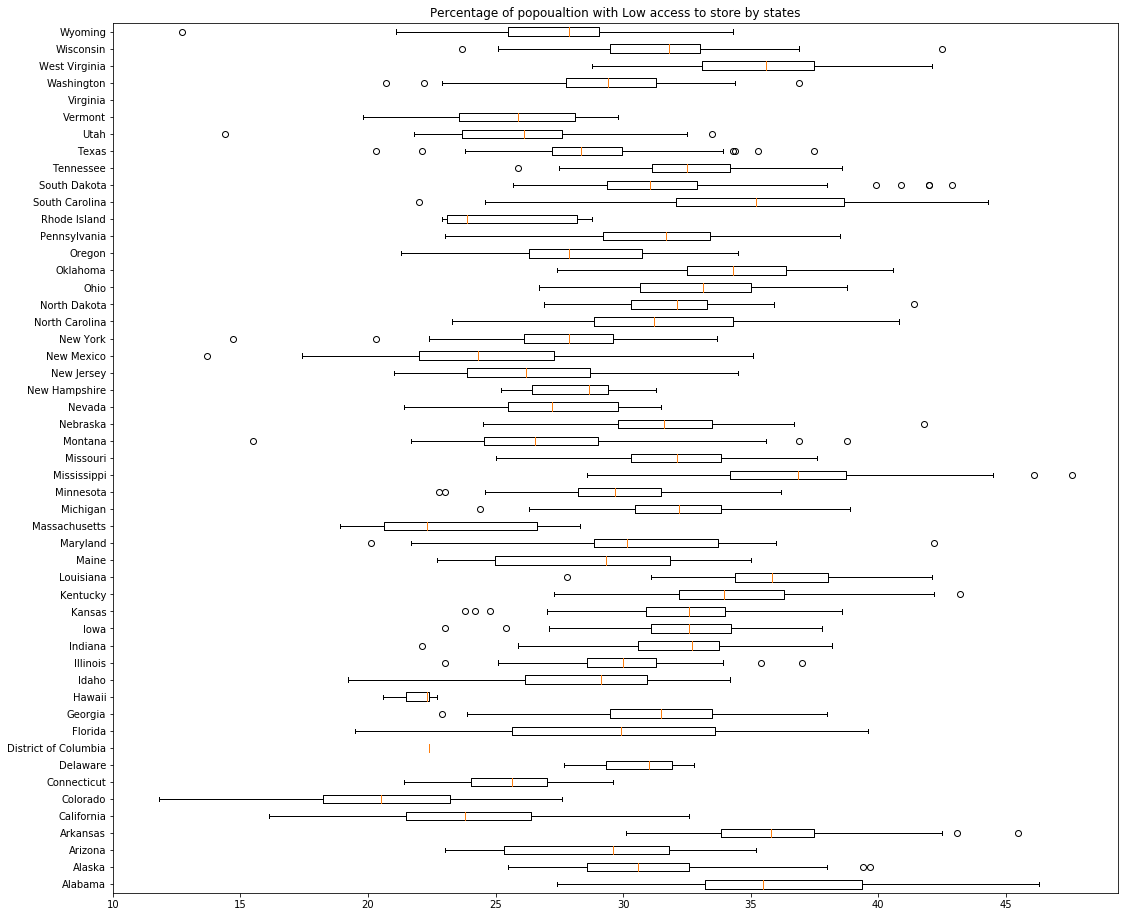

In [68]:
for col in ['2013_db', '2013_ob', 'Adult_db', 'Adult_ob']:
    print ('states with largest average {} are '.format(col), list(df_mean_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with largest range of {} are '.format(col), list(df_range_by_states.sort_values(by=col,ascending=False).index[:3]))
    print ('states with most skewed distribution of {} are '.format(col), list(df_skew_by_states.sort_values(by=col,ascending=False).index[:3]))
    Boxplot_by_state(df, col=col, by='State_name', vert=0)
    plt.title('Percentage of popoualtion with Low access to store by states')
    plt.legend()
    plt.show()

Multivariate analysis

In [113]:
#import packages
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

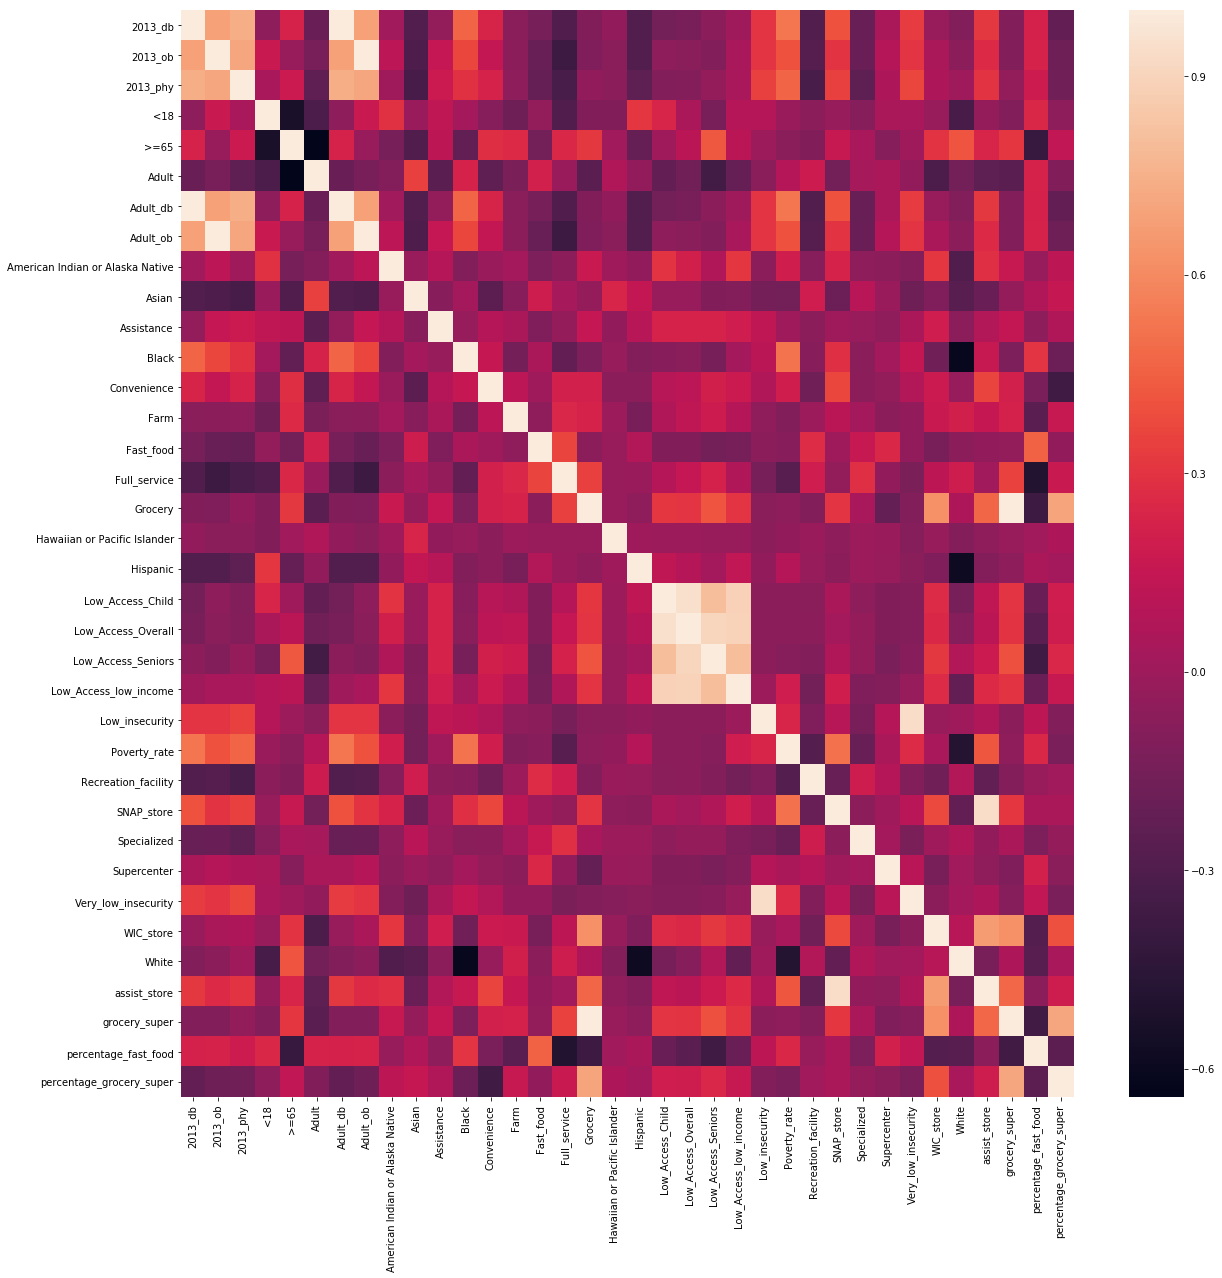

In [72]:
# Construct the covariance matrix
import numpy as np
import seaborn as sns

plt.figure(figsize=(20, 20))  
df_corr=df[df.columns.difference(['State','County'])]
corr=df_corr.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()


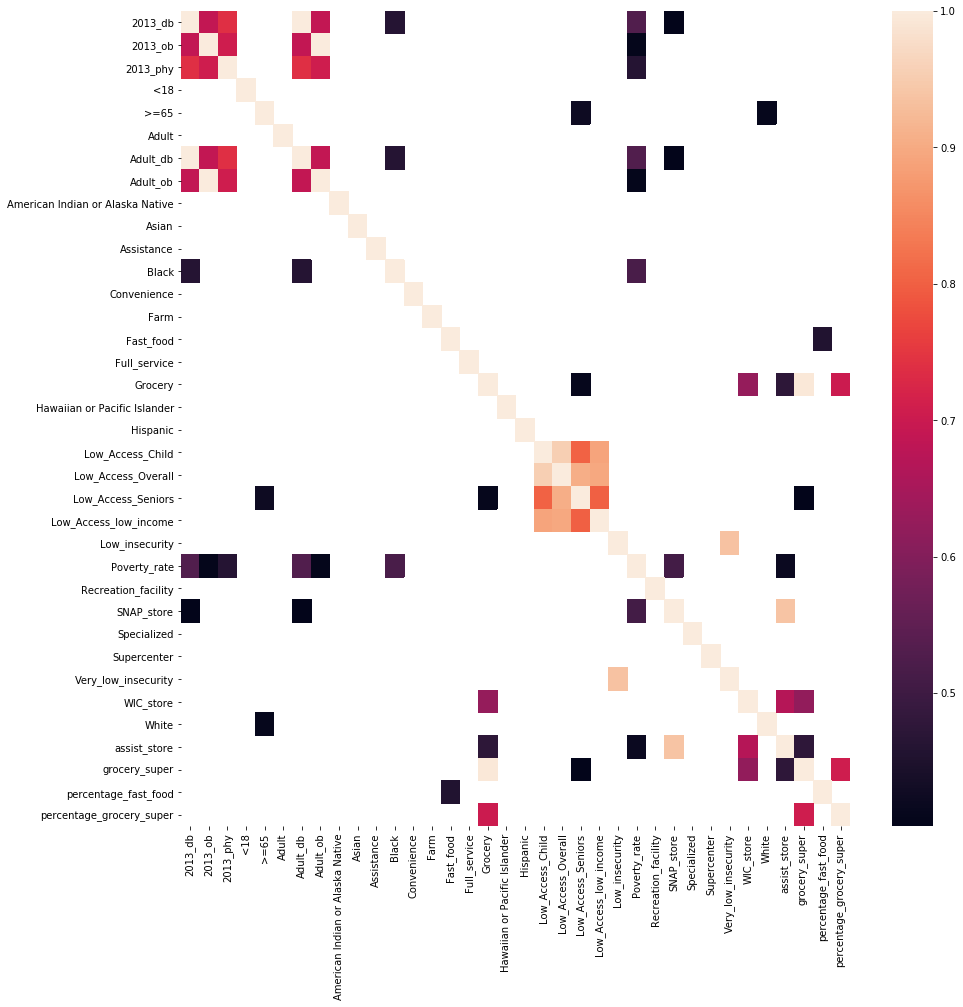

In [79]:
#to get a better intuition, highlights all pairts with relatively high postivie correlation or relatively high negative correlation
# threshold for correlation coefficient is chosen arbiturarily. Here I chose 0.4 and -0.4 as the thresholds. 

#visualize all high positive correlations
high_pos_corr=corr[corr>0.4]
plt.figure(figsize=(15, 15))
sns.heatmap(high_pos_corr, xticklabels=high_pos_corr.columns, yticklabels=high_pos_corr.columns)
plt.show()

This heatmap show interesting patterns
i. the prevalence of physical inactivity is correlated with prevalence of diabetes
and obesity, which is quite expected. 
ii. Physical inactivity also has a moderate correlation with poverty rate, which could be because that people who live in area with high poverty rate have poorer access to recreation areas or facilities. 
iii. Except for physical inactivity, poverty rate also has a moderate correlation with percentage of black population, prevalence of diabetes and obesity. It is one of the few variables that has noticable positive correlation with multiple variables. It is reasonable since poverty rate suggest the ability to afford healthy food and healthcare, and therefore can affect population food choice and health. 
iv. Another interesting correlation is the one between the percentage of population over 65 years old and percentage of popualtion who are White. It could be result of the relatively low birth rate among White popualtion, which increases the weight of senior people. 

There are also some other correlations that are more expected. For example, the percentage of population with low access to grocery stores is highly correlated with the percentage of this population who are children, seniors or with low income. Similarly, the percentage of fast food among both types of restaurants (fast food and full service) has a positive correlation with number of fast food restaurants availabel. 

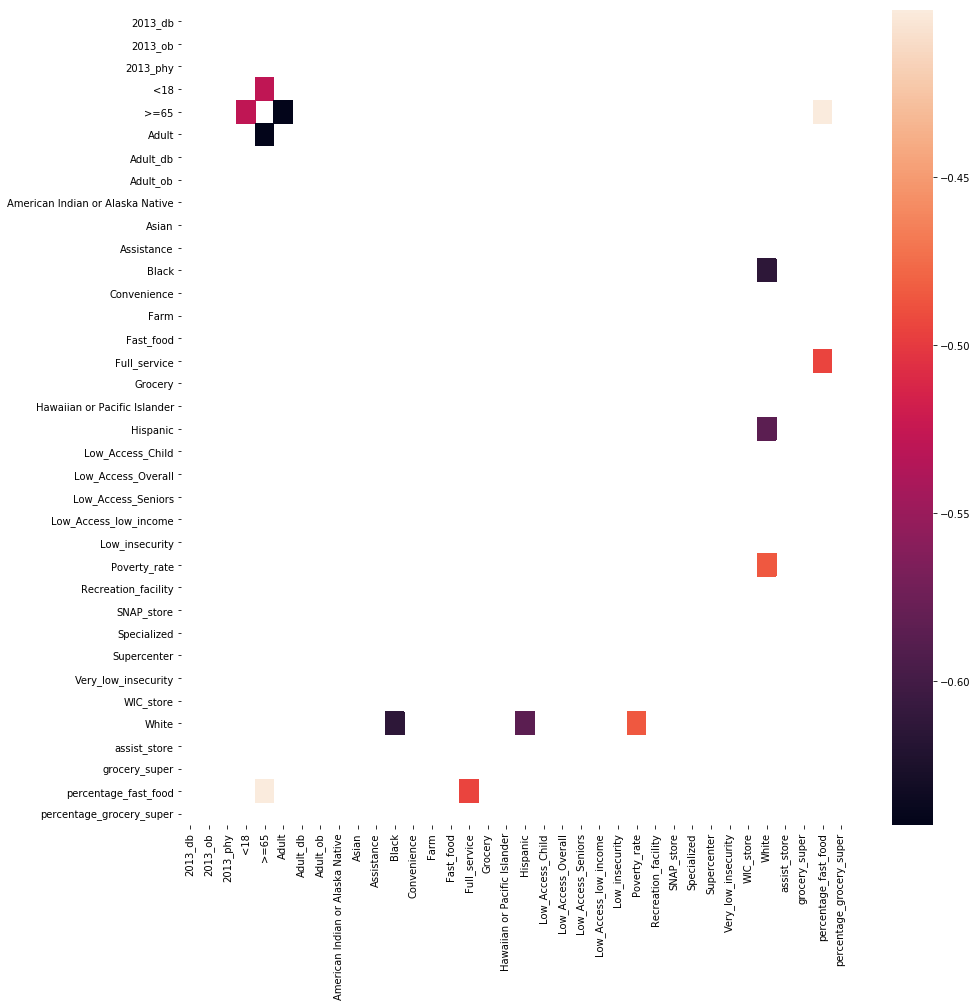

In [80]:
#visualize all high positive correlations
plt.figure(figsize=(15, 15))
high_neg_corr=corr[corr<-0.4]
sns.heatmap(high_neg_corr, xticklabels=high_neg_corr.columns, yticklabels=high_neg_corr.columns)
plt.show()

One interesting phenomenon in the above heatmap is that poverty rate has negative correlation with percentage of White people among the population. 

Several other correlations are result of interdependence: negative correlations among the percentage of White, Black and Hispanic people among the population; negative correlation between number of full service restaurants and the percentage of fast food restaurants; negative correlation between the percentage of people who are over 65 years old and that of people who are under 18 years old.

In summary, there are several interesting phenomenon in the above two heatmaps: 
    
i. There is strong correlation among poverty rate, prevalence of diabetes, obesity and physical inactivity
iii. Areas with high poverty rate also tend to be areas with higher percentage of blacks but lower percentage of white people
iv. There is a moderate positive relationship between the percentage of fast food restaurants and prevalence of diabetes, obesity and physical activity
v. Population with higher percentage of senior people tend to reside in area with smaller percentage of fast food restaurant

This suggests that prevalence of diabetes and obesity can differ by areas with different composition of age, race, food choice, level of poverty and level of physical activity and recreation facilities. 

Among these factors, poverty rate, prevalence of physical inactivity, age and percentage of fast food restaurants seem to be the four most important factors that represent an area with high prevalence of diabetes or obesity.

To get better intuition, I observe the relationships using scatter plots among the overall population, 
within each level of diabetes prevalence or each level of obesity prevalence

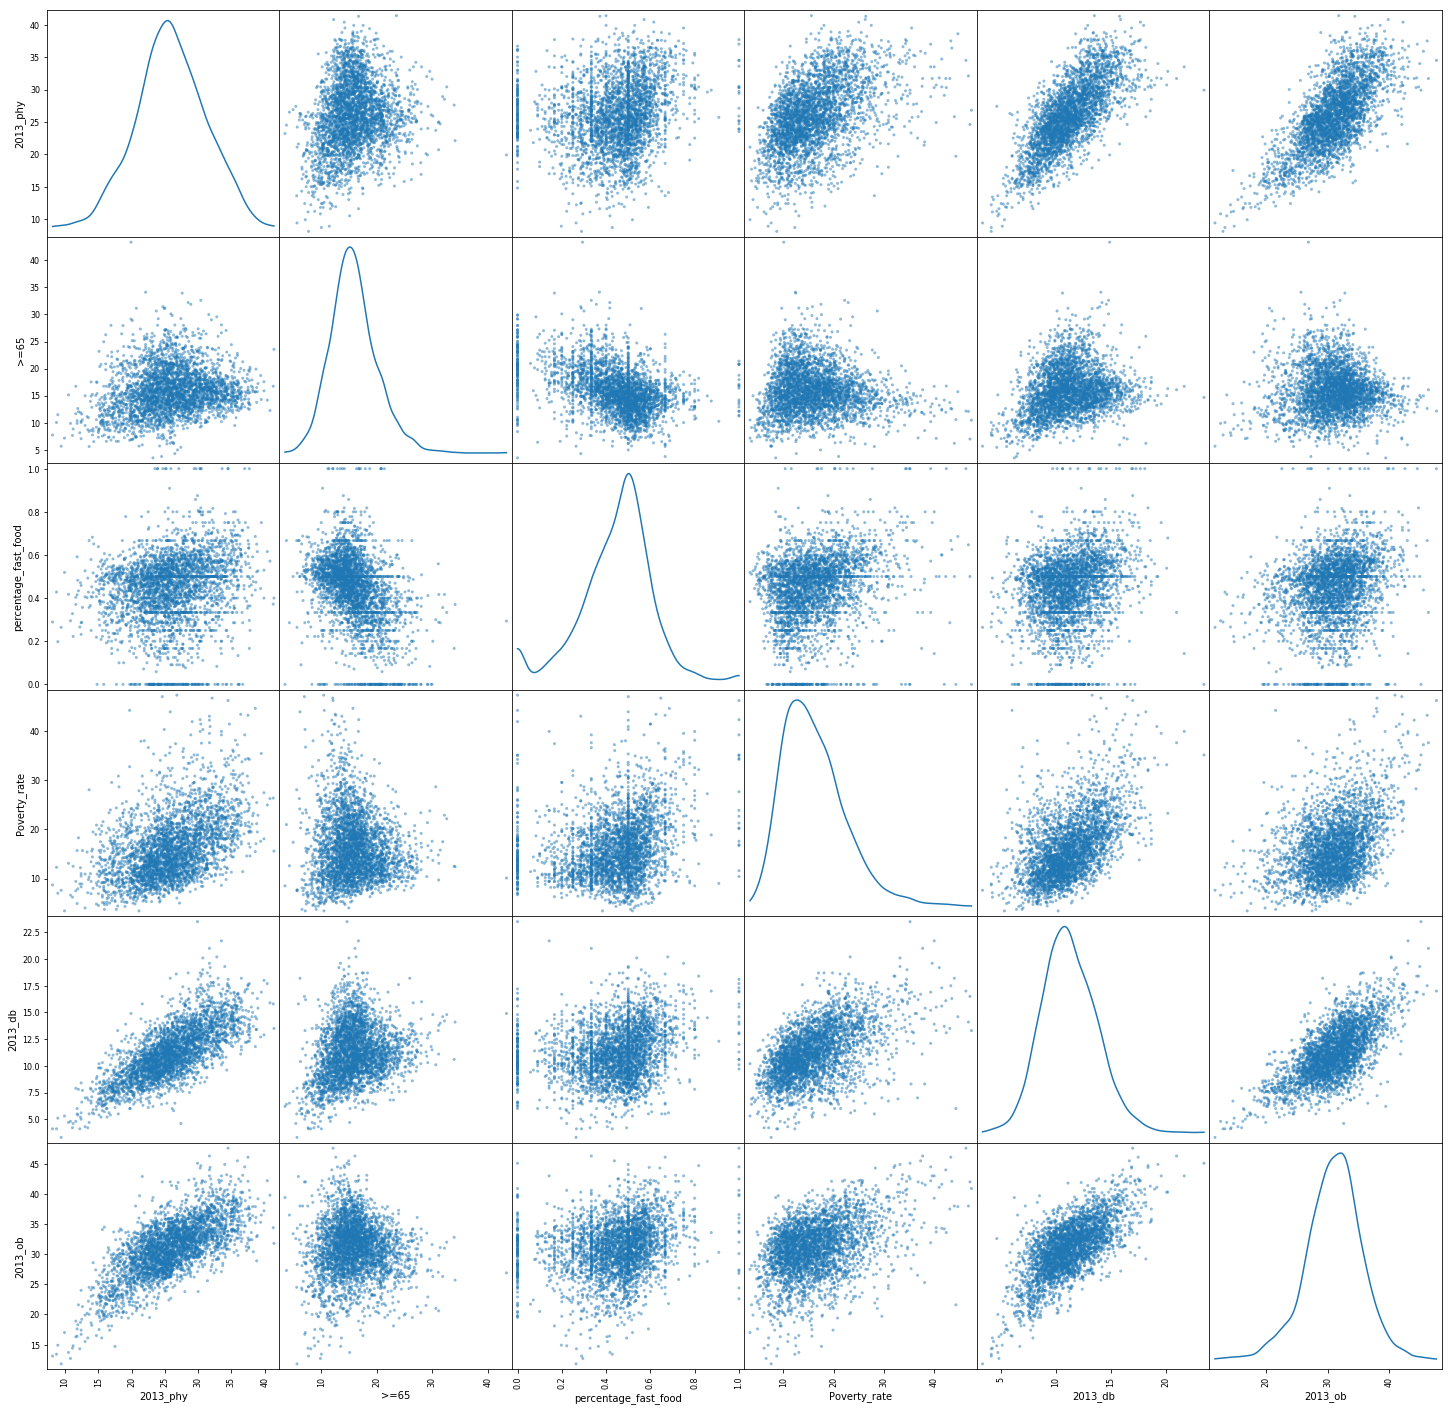

In [105]:
from pandas.plotting import scatter_matrix

var_to_plot=['2013_phy', '>=65', 'percentage_fast_food','Poverty_rate', '2013_db', '2013_ob']
df_subset=df[var_to_plot]
scatter_matrix(df_subset,figsize=(25, 25), diagonal='kde')
plt.show()

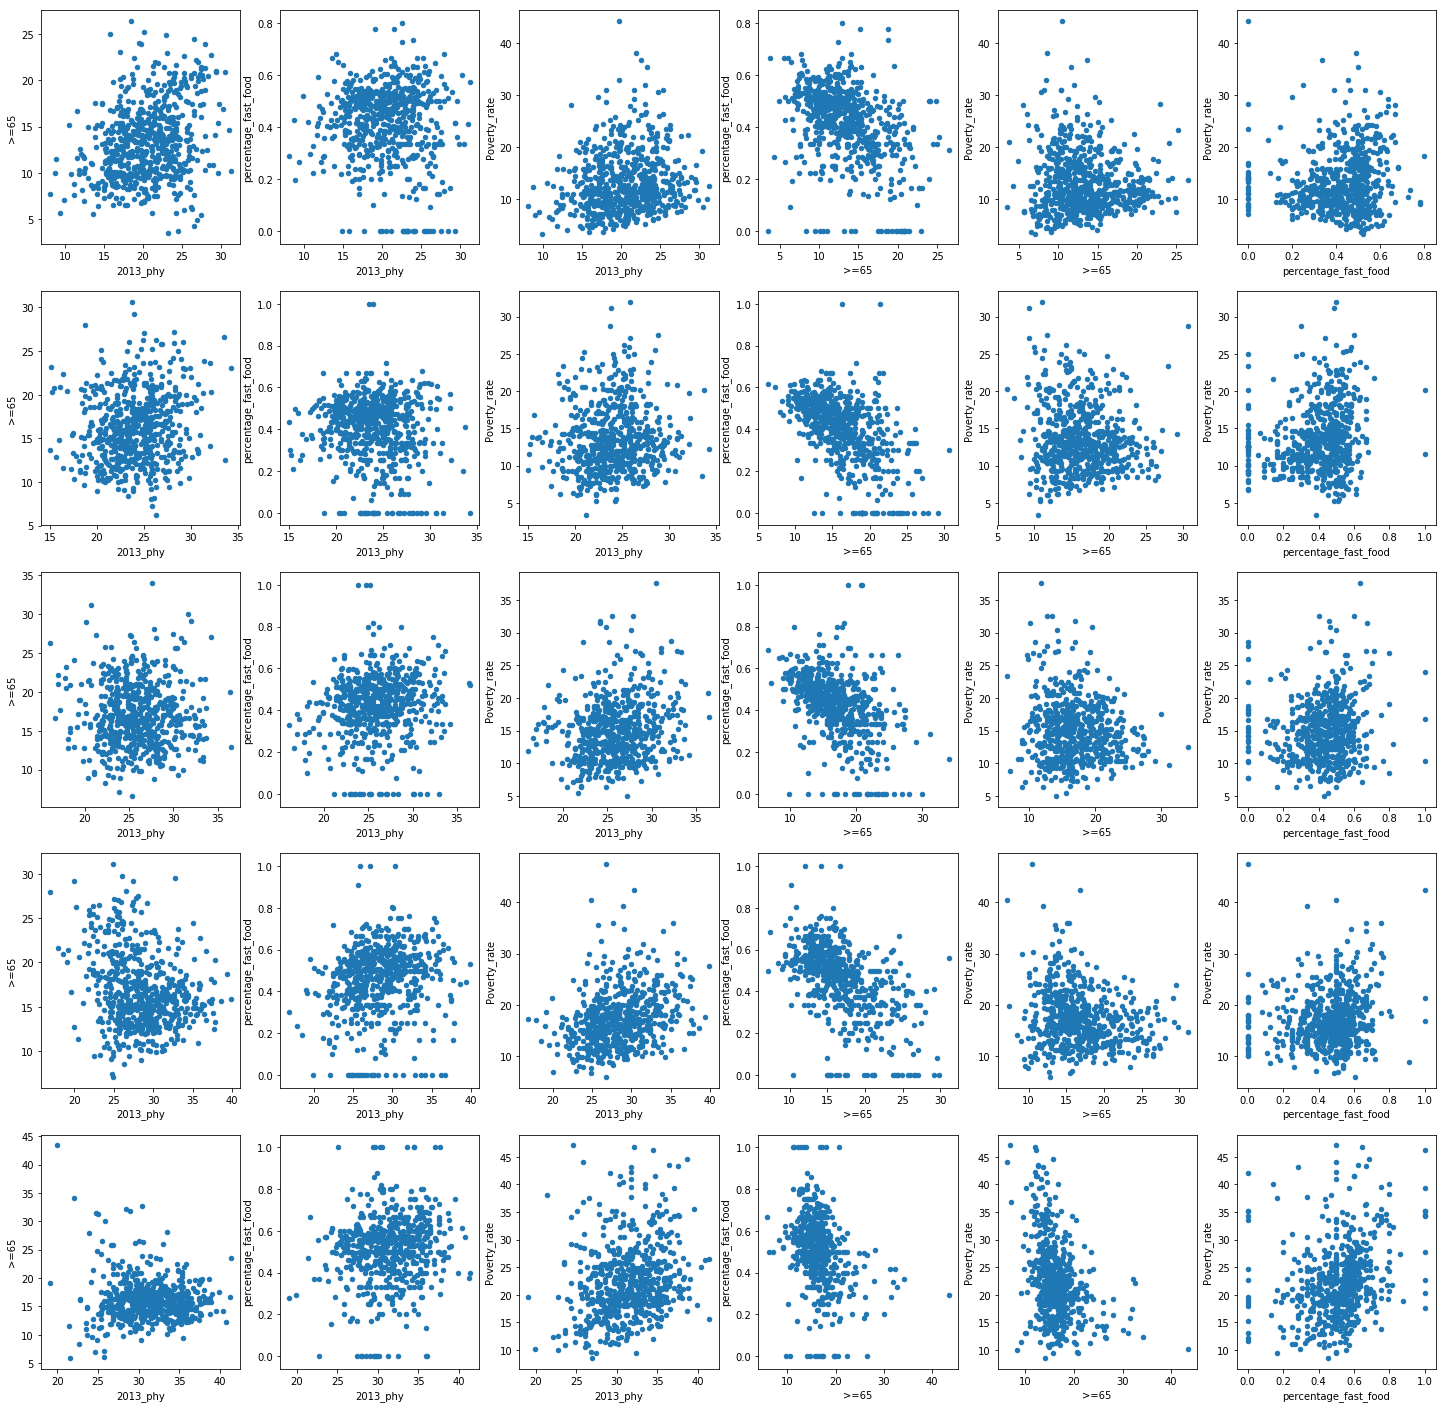

In [109]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(25, 25))

for m,db in enumerate(["very low", "low", "median","high","very high"]):
    df_subset=df[df['db_level']==db]
    #print (df_subset)
    for n,y in enumerate(['>=65', 'percentage_fast_food','Poverty_rate']):
        df_subset.plot(x='2013_phy',y=y, kind='scatter',ax=axes[m, n])
    for n,y in enumerate(['percentage_fast_food','Poverty_rate']):
        df_subset.plot(x='>=65',y=y, kind='scatter',ax=axes[m, n+3])
    df_subset.plot(x='percentage_fast_food',y='Poverty_rate', kind='scatter',ax=axes[m,5])
    #plt.xlabel='prevalence of '
plt.show()

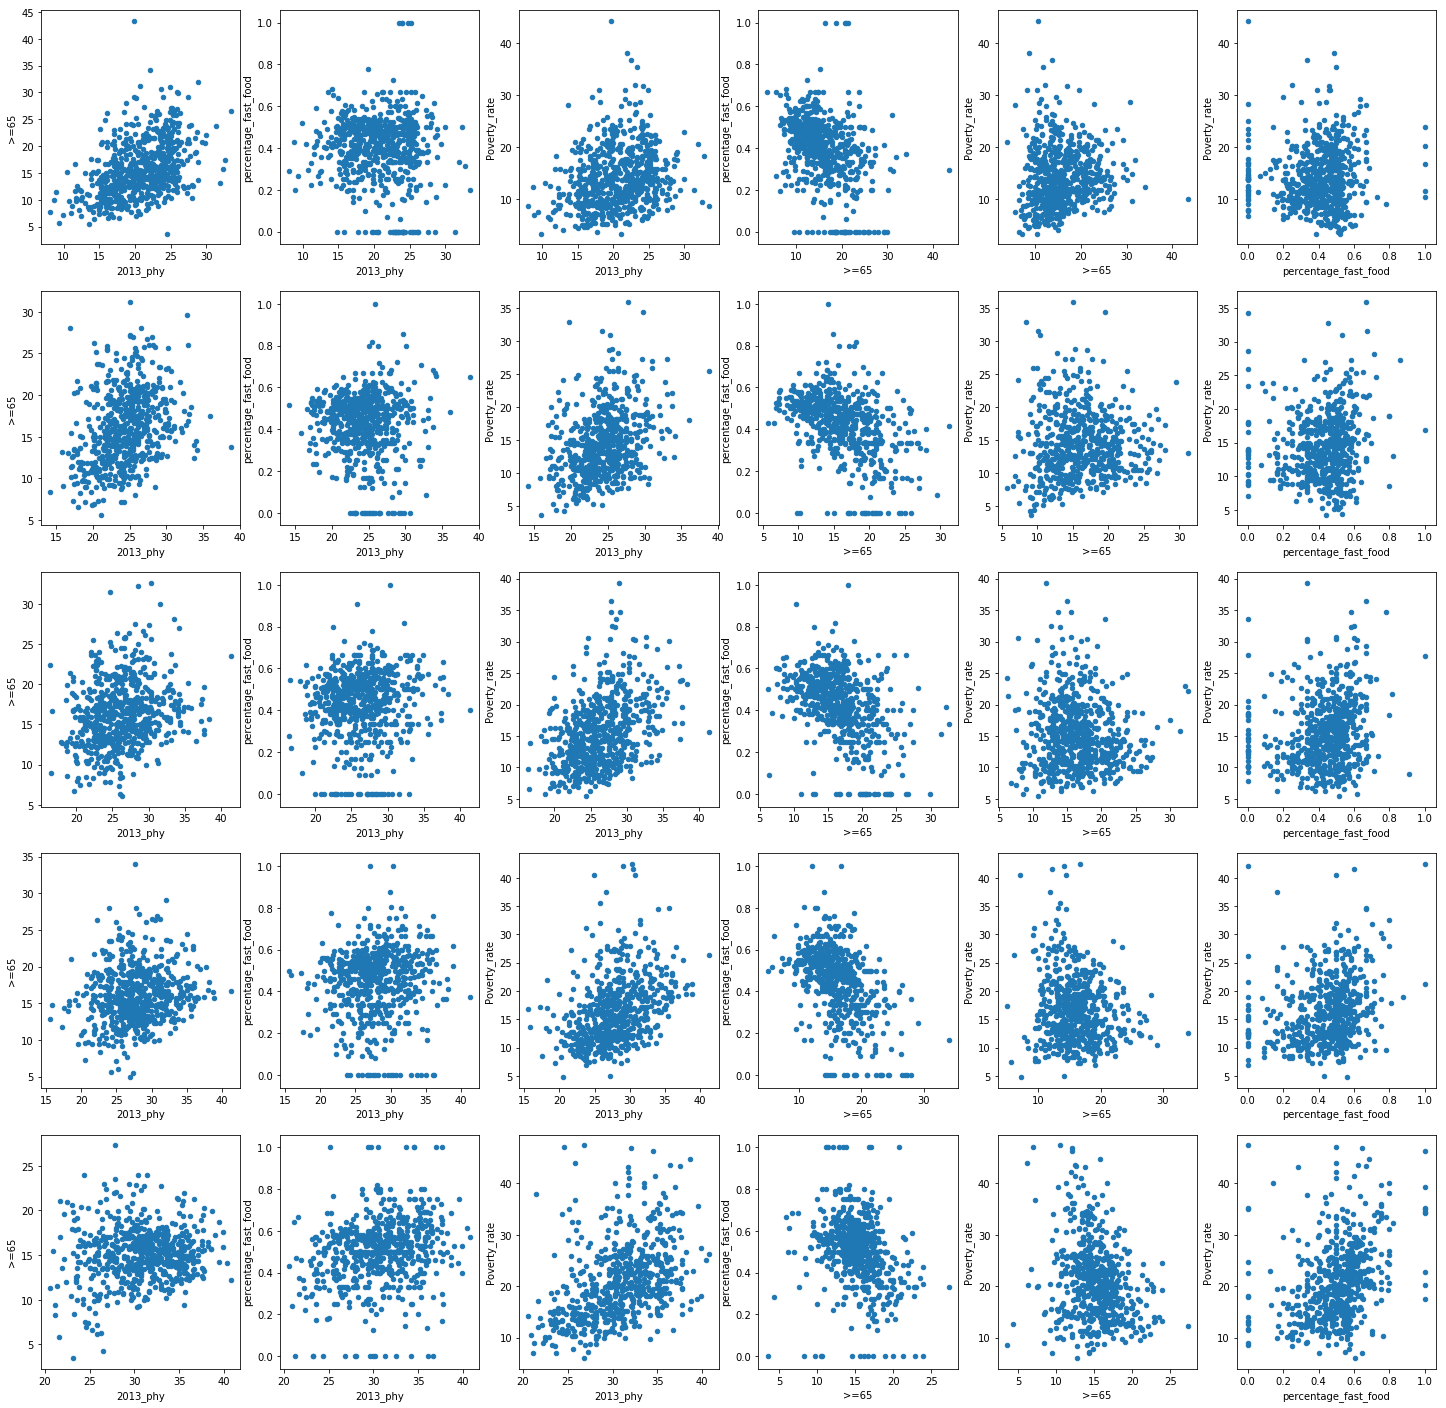

In [110]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(25, 25))

for m,ob in enumerate(["very low", "low", "median","high","very high"]):
    df_subset=df[df['ob_level']==ob]
    #print (df_subset)
    for n,y in enumerate(['>=65', 'percentage_fast_food','Poverty_rate']):
        df_subset.plot(x='2013_phy',y=y, kind='scatter',ax=axes[m, n])
    for n,y in enumerate(['percentage_fast_food','Poverty_rate']):
        df_subset.plot(x='>=65',y=y, kind='scatter',ax=axes[m, n+3])
    df_subset.plot(x='percentage_fast_food',y='Poverty_rate', kind='scatter',ax=axes[m,5])
    #plt.xlabel='prevalence of '
plt.show()

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\anaconda\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


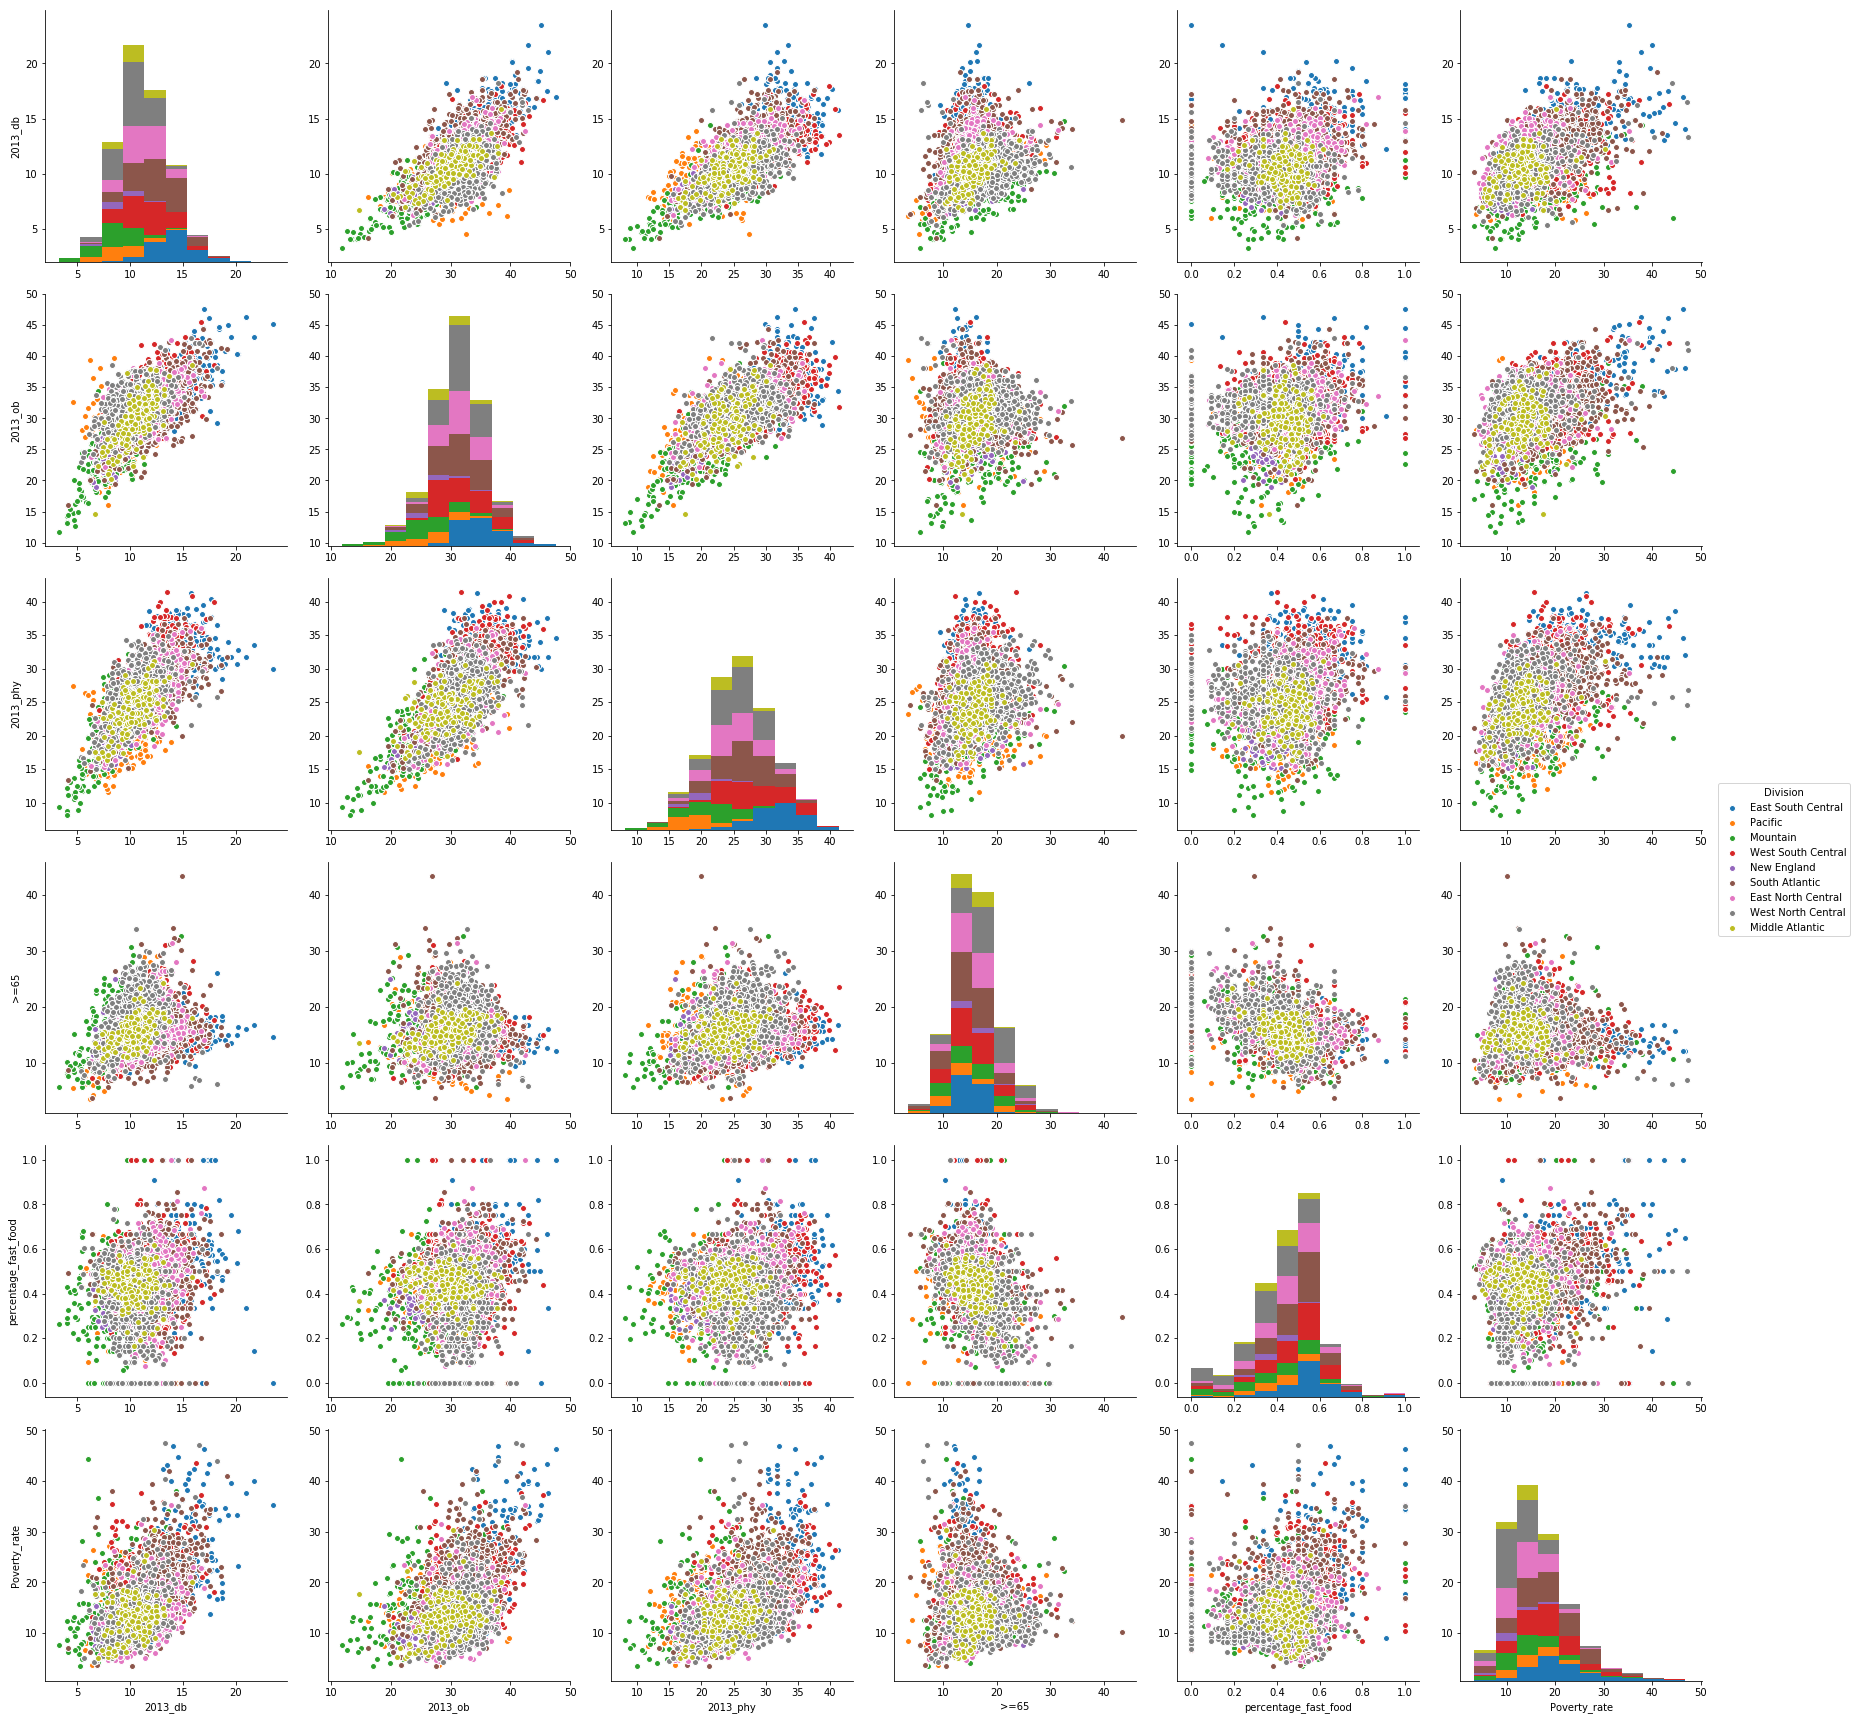

In [119]:
plt.figure(figsize=(40, 40))
df_subset=df[['2013_db','2013_ob','2013_phy','>=65', 'percentage_fast_food','Poverty_rate','Division']]
sns.pairplot(df_subset, hue="Division", size=4)    
plt.show()

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\anaconda\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


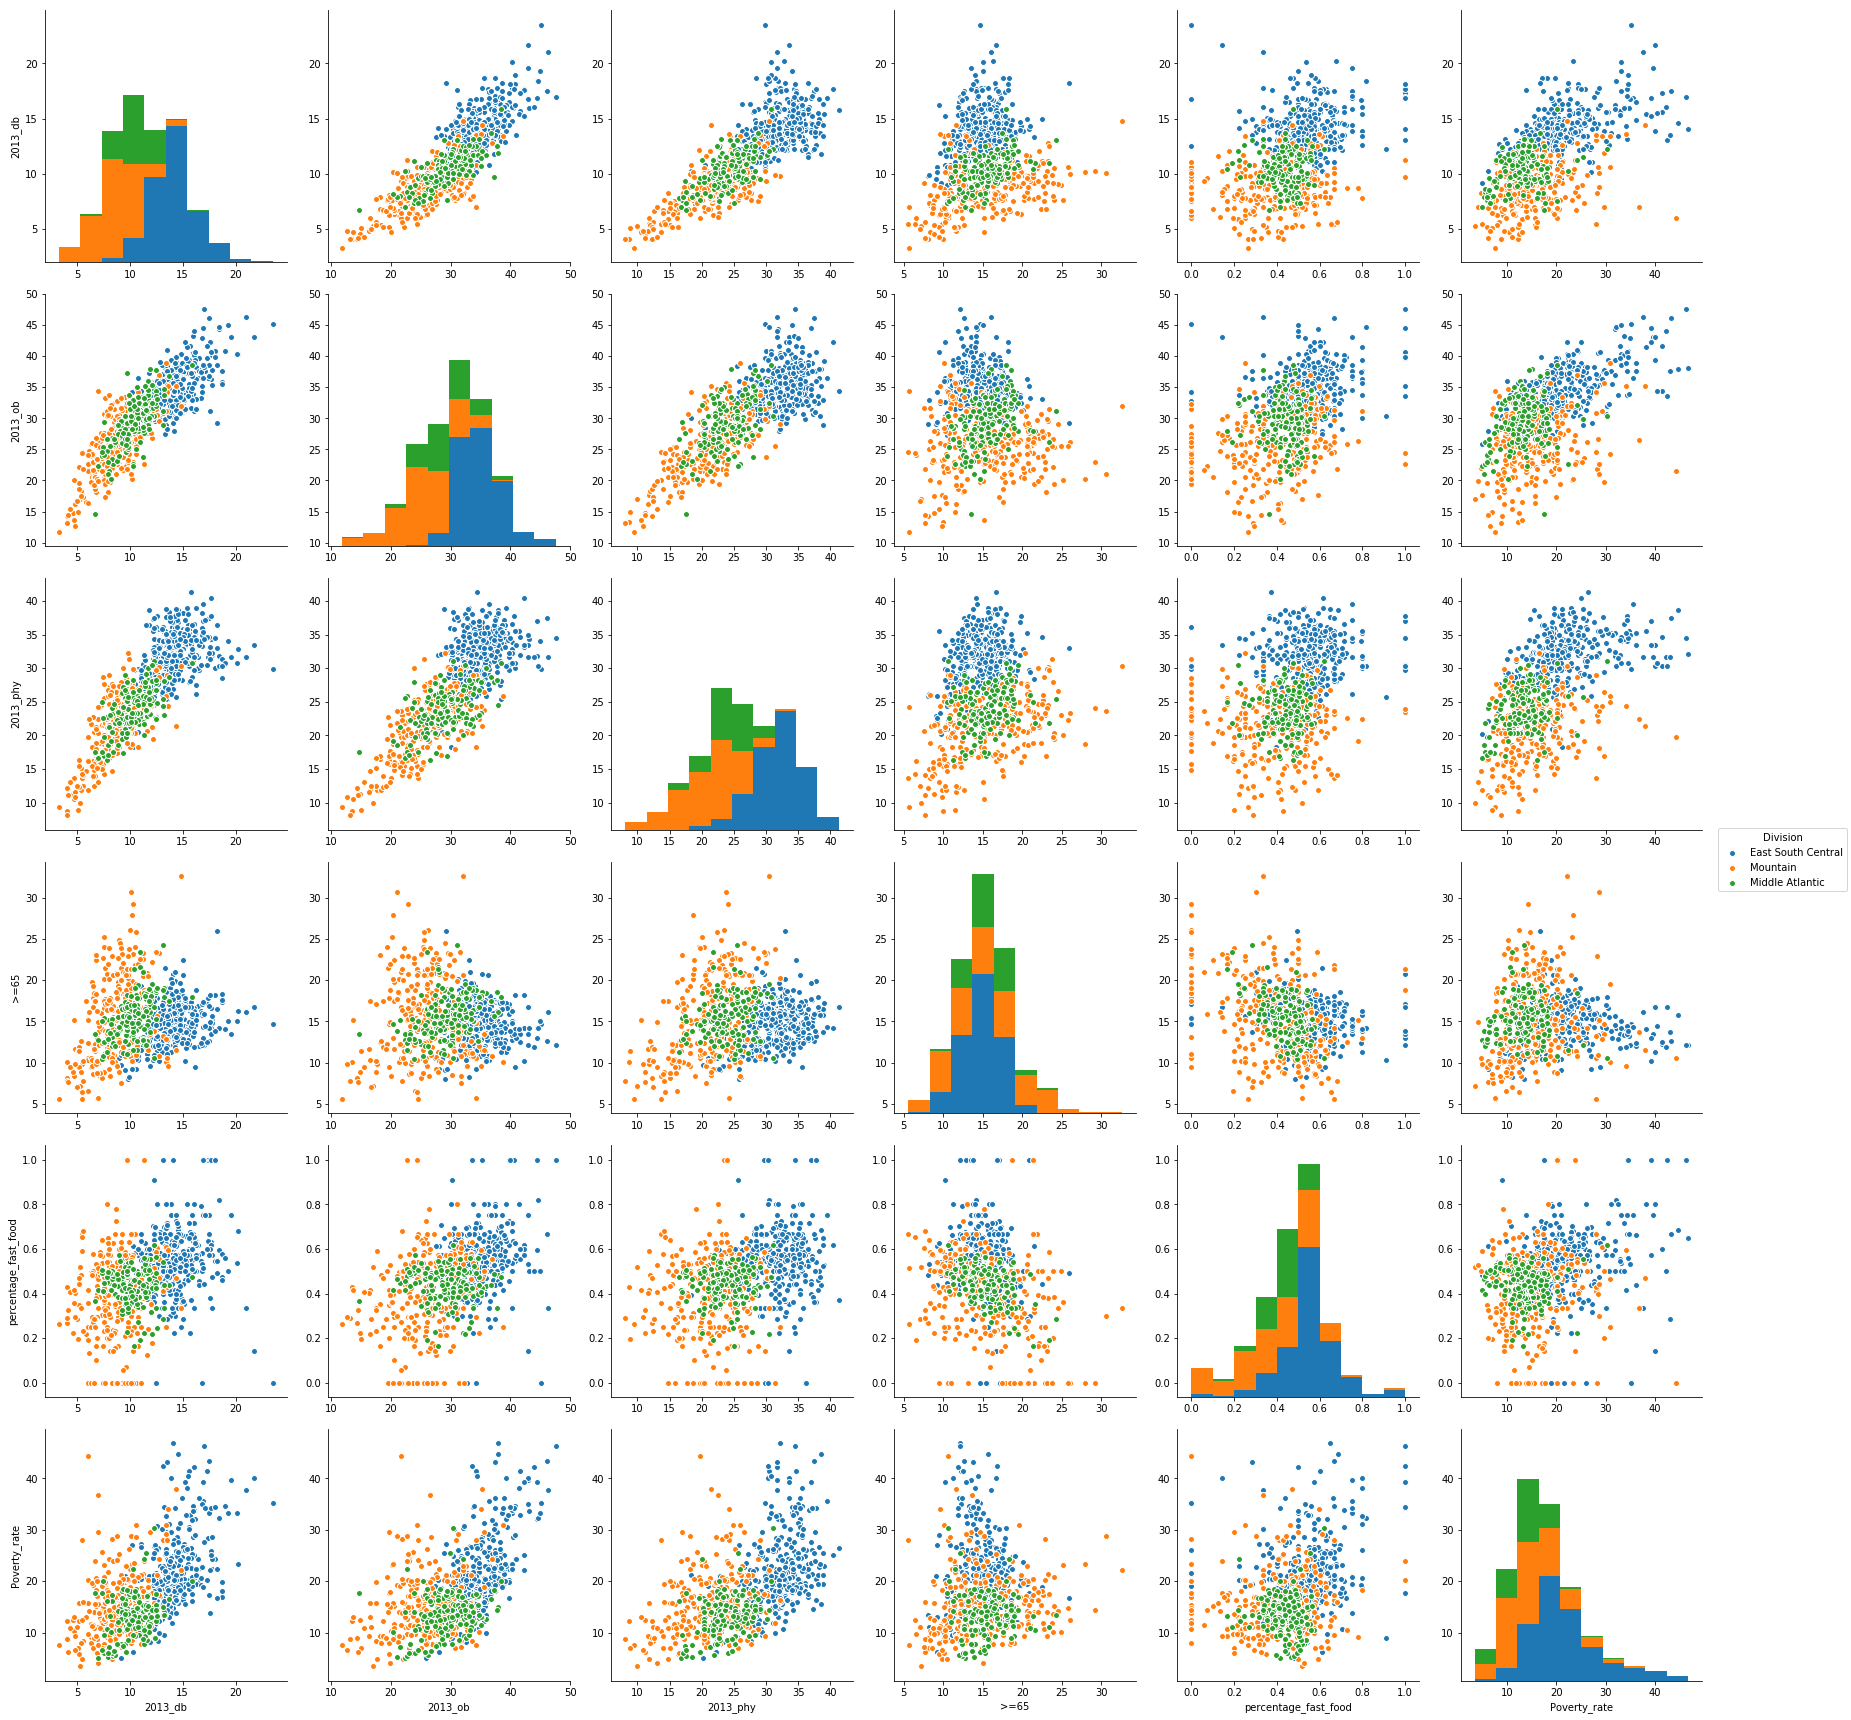

In [125]:
plt.figure(figsize=(40, 40))
df_subset=df[['2013_db','2013_ob','2013_phy','>=65', 'percentage_fast_food','Poverty_rate','Division']][df['Division'].isin(['Middle Atlantic', 'Mountain', 'East South Central'])]
sns.pairplot(df_subset, hue="Division", size=4)    
plt.show()